<div style="border:solid Green 2px; border-radius: 10px;  padding: 40px">
<b>Привет, Андрей!👋</b>
    
Меня зовут Зуева Юлия, можно просто Юля 😏 Я буду ревьюером твоего проекта. Рада очередной нашей встрече! Начну со стандартного вступления.
    
Моя основная цель - помочь тебе стать компетентным Data Scientist'ом: вместе преодолеть трудности и еще больше развить твои сильные навыки 💪 В твоей работе я оставила комментарии, которые должны в этом помочь. Для твоего удобства комментарии расскрашены разными цветами: 
<br/>
<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> В случае корректного решения (или отдельных его моментов). На такие решения можно опираться в будущем.
</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> Если есть возможность как-либо улучшить решение. Ты можешь учесть эти комментарии при доработке проекта, однако для зачета это не обязательно.
</div>
<div style="border-radius: 10px" class="alert alert-block alert-danger">
<b>Нужно доработать ❌:</b> Если решение требует внесения правок. Проект не может быть принят, если остались не отработанные комментарии данного типа.
</div>
    
Чтобы наша с тобой работа была еще эффективнее, ты точно так же можешь оставлять комментарии и задавать мне вопросы. Для таких случаев, пожалуйста, выбери собственное оформление комментариев, которое будет отличаться от моего, чтобы не создавалась путаница. По этой же причине попрошу тебя не удалять и не изменять мои комментарии. Все это позволит лучше ориентироваться в нашем с тобой диалоге, а повторную проверку (в случае ее необходимости) выполнять оперативнее 🚀
    
Не спеши расстраиваться, если что-то не удалось с первого раза. Вместе мы обязательно разберемся со всеми трудностями! 🤓

# Анализ лояльности пользователей Яндекс Афиши

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Вводная часть <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> В любой работе важно оставлять вводную часть. Она помогает быстро понять цель, контекст и структуру работы, что будет удобно не только для тебя при возвращении к проекту спустя время, но и любому другому читателю (если, например, публикуешь в открытый доступ для портфолио). Воспринимаем эту тетрадку не просто как выполнение домашней работы на курсе, а как полноценный исследовательский проект.

Как правило, в вводную часть включают название проекта, краткое описание цели, используемых данных (источники, объем, особенности), нюансы самого проекта (специфические условия, ограничения, предположения и т.д.). Иногда также сразу обозначают план шагов. Другими словами, вводная часть призвана отразить, что мы делаем, с чем работаем и на каких условиях.
</div>

## Этапы выполнения проекта

### 1. Загрузка данных и их предобработка

---

**Задача 1.1:** Напишите SQL-запрос, выгружающий в датафрейм pandas необходимые данные. Используйте следующие параметры для подключения к базе данных `data-analyst-afisha`:

- **Хост** — `rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net`
- **База данных** — `data-analyst-afisha`
- **Порт** — `6432`
- **Аутентификация** — `Database Native`
- **Пользователь** — `praktikum_student`
- **Пароль** — `Sdf4$2;d-d30pp`

Для выгрузки используйте запрос из предыдущего урока и библиотеку SQLAlchemy.

Выгрузка из базы данных SQL должна позволить собрать следующие данные:

- `user_id` — уникальный идентификатор пользователя, совершившего заказ;
- `device_type_canonical` — тип устройства, с которого был оформлен заказ (`mobile` — мобильные устройства, `desktop` — стационарные);
- `order_id` — уникальный идентификатор заказа;
- `order_dt` — дата создания заказа (используйте данные `created_dt_msk`);
- `order_ts` — дата и время создания заказа (используйте данные `created_ts_msk`);
- `currency_code` — валюта оплаты;
- `revenue` — выручка от заказа;
- `tickets_count` — количество купленных билетов;
- `days_since_prev` — количество дней от предыдущей покупки пользователя, для пользователей с одной покупкой — значение пропущено;
- `event_id` — уникальный идентификатор мероприятия;
- `service_name` — название билетного оператора;
- `event_type_main` — основной тип мероприятия (театральная постановка, концерт и так далее);
- `region_name` — название региона, в котором прошло мероприятие;
- `city_name` — название города, в котором прошло мероприятие.

---


In [1]:
import pandas as pd
from sqlalchemy import create_engine 
from phik import phik_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mannwhitneyu
from scipy.stats import stats
import os
from dotenv import load_dotenv




<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Импорты <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 

* Все необходимые библиотеки лучше подгружаешь сразу в начале проекта, это соответсвует стандартам оформления кода <a href='https://pyplanet.ru/article/pep-0008.html'>PEP 8</a>. Такой подход позволяет сразу видеть, какое окружение необходимо для запуска проекта, избежать дублирования импортов в разных частях кода, а также облегчить отладку и переносимость проекта. Сейчас ниже в проекте у тебя встречаются повторные подгрузки.
    
    
* Хорошей практикой также является упорядочивание импортов. PEP 8 рекомендует снчала подгружать стандартные python-библиотеки, затем сторонние. Но для удобства каждую их этих групп также можно стуктурировать по тематике. Например, библиотеки для работы с данными, для работы с графиками и т.д. Тогда будет удобнее поддерживать порядок в импортах от проекта к проекту, не подгружать лишнее.

    
* Напомню, что перед отправкой проекта важно сбрасывать ядро (очищать память от созданных объектов) и заново запускать проект с самого начала, чтобы проверить на наличие ошибок в коде при последовательном исполнении ячеек. Сейчас этого сделано не было, нумерация ячеек начинается не с 1.
    
</div>

In [2]:
load_dotenv()

True

In [3]:
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    os.getenv('DB_USER'),
    os.getenv('DB_PASSWORD'), 
    os.getenv('DB_HOST'),
    os.getenv('DB_PORT'),
    os.getenv('DB_NAME'),
)

In [4]:
engine = create_engine(connection_string) 

In [5]:
query = '''
WITH set_config_precode AS (
  SELECT set_config('synchronize_seqscans', 'off', true)
)

SELECT 
    p.user_id,
    p.device_type_canonical,
    p.order_id,
    p.created_dt_msk AS order_dt,
    p.created_ts_msk AS order_ts,
    p.currency_code,
    p.revenue,
    p.tickets_count,
    p.created_dt_msk::DATE - LAG(p.created_dt_msk::DATE) OVER (
        PARTITION BY p.user_id 
        ORDER BY p.created_dt_msk
    ) AS days_since_prev,
    p.event_id,
    e.event_name_code AS event_name,
    e.event_type_main,
    p.service_name,  -- берём из purchases, как указано в схеме
    c.city_name,
    r.region_name
FROM afisha.purchases AS p
JOIN afisha.events AS e
    ON p.event_id = e.event_id
JOIN afisha.city AS c
    ON e.city_id = c.city_id
JOIN afisha.regions AS r
    ON c.region_id = r.region_id
WHERE 
    p.device_type_canonical IN ('mobile', 'desktop')
    AND e.event_type_main != 'фильм'
ORDER BY p.user_id
''' 

In [6]:
df = pd.read_sql_query(query, con=engine) 

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Загрузка данных <a class="tocSkip"></h4>
<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Выгрузка данных проведена корректно! Была выполнена необходимая фильтрация данных, выгружены только необходимые для анализа данные. Отлично, что сразу подсчитываешь время между заказами для каждого пользователя.
 
</div>
<div style="border-radius: 10px" class="alert alert-block alert-danger">
<b>Нужно доработать ❌:</b> Сейчас ты явным образом прописываешь параметры подключения к БД. В таком виде выкладывать работу в публичный доступ небезопасно, кто-то сможет завладеть подключением, украсть или повредить данные. Лучше сразу в процессе работы держать чувствиительные значения отдельно от основного содержания, иначе есть высокий риск забыть об этом нюансе. По этой же причине нужно убрать ключи и из описания задания.
    
Чтобы засекретить подключение, необходимо сложить все параметры в `.env` файл (или другой конфигурационный файл вне Git) и указать его в `.gitignore`:

```python
DB_NAME="..."
DB_HOST="..."
DB_PORT="..."
DB_USER="..."
DB_PASSWORD="..."
```
    
В самом проекте мы можем обращаться к сохраненным параметрам, для этого нам потребуются библиотеки `dotenv`, чтобы загрузить переменные окружения, и `os`, чтобы обратиться к ним:
    
```python
import os
import dotenv
    
load_dotenv() # автоматически ищет .env в текущей директории
    
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    os.getenv('DB_USER'),
    os.getenv('DB_PASSWORD'),
    os.getenv('DB_HOST'),
    os.getenv('DB_PORT'),
    os.getenv('DB_NAME'),
) 
```
</div>

---

**Задача 1.2:** Изучите общую информацию о выгруженных данных. Оцените корректность выгрузки и объём полученных данных.

Предположите, какие шаги необходимо сделать на стадии предобработки данных — например, скорректировать типы данных.

Зафиксируйте основную информацию о данных в кратком промежуточном выводе.

---

In [7]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  event_name             290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  service_name           290611 non-null  obje

None

In [8]:
display(df.head(5))

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,city_name,region_name
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,Край билетов,Глиногорск,Каменевский регион
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,40efeb04-81b7-4135-b41f-708ff00cc64c,выставки,Мой билет,Глиногорск,Каменевский регион
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,другое,За билетом!,Глиногорск,Каменевский регион
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,2f638715-8844-466c-b43f-378a627c419f,другое,Лови билет!,Озёрск,Североярская область
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,10d805d3-9809-4d8a-834e-225b7d03f95d,стендап,Билеты без проблем,Родниковецк,Озернинский край


Мы получили датафрейм на 290611 строк и 15 столбцов. Как мы видим, что пропуски у нас только в "days_since_prev"(это было в условиях). Если что возьмем данные с имееющимися значениями в "days_since_prev"(не особо мнго пропусков).
Предобработка: 
1)Я считаю, что корректировать типы данных тут не нужно, все выглядит верно. 
2)Название столбцов уже преведено к snake стилю.
3)Нужно будет проверить на дубликаты
4)Создать новый столбец "revenue_rub" со всей выручкой в рублях
5)Можно поискать аномалии с выручкой и предположить, что это может быть 

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Проверка корректности загруженных данных <a class="tocSkip"></h4>
<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> 

* Хорошо, что убеждаешь в корректности данных! Если при подгрузке возникли проблемы, а мы их не обнаружим, все последующие расчеты могут быть искажены.

    
* Круто, что не забываешь зафиксировать промежуточные наблюдения в выводах! Если потребуется вернуться к проекту спустя время, будет проще освежить в памяти все ключевые этапы работы, что и почему мы делали, что получили.

</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 
    
* Было бы не лишним пояснить, почему в `days_since_prev` могут наблюдаться пропуски, проблема ли это, или это нормальная ситауция. В нашем случае, скорее всего, пропуски образовались только на первых заказах пользователей, в таком случае у них не существует предыдущего, от которого можно было бы посчитать количество дней. Выкидывать такие наблюдения будет неправильно.
 
    
* По результатам проверки корректности загруженных данных мы планируем дальнейшие шаги по обработке. Здесь можно было отметить, что нам также потребуется убедиться, что пропуски действительно имеются только у первых заказов, выполнить проверку на дубликаты (не только полные, но и неполные), проверить категориальные столбцы на предмет неявных дубликатов (разный регистр, разный формат записи, опечатки) и **все** числовые столбцы на наличие невалидных значений и аномалий, опционально сменить типы данных на более оптимальные, чтобы уменьшить тяжесть данных.
    
</div>

---

###  2. Предобработка данных

Выполните все стандартные действия по предобработке данных:

---

**Задача 2.1:** Данные о выручке сервиса представлены в российских рублях и казахстанских тенге. Приведите выручку к единой валюте — российскому рублю.

Для этого используйте датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю за 2024 год — `final_tickets_tenge_df.csv`. Его можно загрузить по пути `https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')`

Значения в рублях представлено для 100 тенге.

Результаты преобразования сохраните в новый столбец `revenue_rub`.

---


In [9]:
print(f"Всего записей: {len(df):,}")
print("\nРаспределение по валютам:")
currency_dist = df['currency_code'].value_counts()
display(currency_dist)

Всего записей: 290,611

Распределение по валютам:


currency_code
rub    285542
kzt      5069
Name: count, dtype: int64

In [10]:
df_initial = df.copy()
print(f"Исходные данные: {df_initial.shape[0]} записей")

tenge_df = pd.read_csv('final_tickets_tenge_df.csv')

# Подготовка данных - используем исходные названия
tenge_df['data'] = pd.to_datetime(tenge_df['data'])
df_initial['date'] = pd.to_datetime(df_initial['order_dt'])

df_with_rates = df_initial.merge(tenge_df, left_on='date', right_on='data', how='left')

# Проверяем объединение
print(f"\nРезультаты объединения:")
print(f"Записей после объединения: {len(df_with_rates)}")
missing_rates = df_with_rates['curs'].isnull().sum()
print(f"Заказов без данных о курсе: {missing_rates}")

# Конвертируем в рубли с учетом номинала
def convert_to_rub(row):
    if row['currency_code'] == 'rub':
        return row['revenue']
    elif row['currency_code'] == 'kzt':
        return row['revenue'] * row['curs'] / row['nominal']
    else:
        return row['revenue']

df_with_rates['revenue_rub'] = df_with_rates.apply(convert_to_rub, axis=1)




Исходные данные: 290611 записей

Результаты объединения:
Записей после объединения: 290611
Заказов без данных о курсе: 0


In [11]:
print("Примеры конвертации:")
check_columns = ['order_id', 'currency_code', 'revenue', 'curs', 'nominal', 'revenue_rub']
# Пример
print("\nЗаписи в KZT (после конвертации):")
kzt_examples = df_with_rates[df_with_rates['currency_code'] == 'kzt'].head(3)[check_columns]
display(kzt_examples)

Примеры конвертации:

Записи в KZT (после конвертации):


,order_id,currency_code,revenue,curs,nominal,revenue_rub
70,7850214,kzt,518.10,19.0125,100,98.503762
89,8634925,kzt,347.18,18.9330,100,65.731589
96,7625522,kzt,328.77,18.5991,100,61.148261


In [12]:
display(df_with_rates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  event_name             290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  service_name           290611 non-null  obje

None

In [13]:
# Удаляем временные столбцы, использованные для конвертации валют
columns_to_drop = ['date', 'data', 'nominal', 'curs', 'cdx']
df_clean = df_with_rates.drop(columns=columns_to_drop)


In [14]:
display(df_clean.info())
display(df_clean.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  event_name             290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  service_name           290611 non-null  obje

None

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,city_name,region_name,revenue_rub
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,Край билетов,Глиногорск,Каменевский регион,1521.94
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,40efeb04-81b7-4135-b41f-708ff00cc64c,выставки,Мой билет,Глиногорск,Каменевский регион,289.45
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,другое,За билетом!,Глиногорск,Каменевский регион,1258.57
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,2f638715-8844-466c-b43f-378a627c419f,другое,Лови билет!,Озёрск,Североярская область,8.49
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,10d805d3-9809-4d8a-834e-225b7d03f95d,стендап,Билеты без проблем,Родниковецк,Озернинский край,1390.41


Пересчитал все выручки в рубли и удалось избежать потери данных при переводе.

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Перевод выручки в рубли <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-block alert-danger">
<b>Нужно доработать ❌:</b> Обрати внимание, что валюта была указана нижним регистром. Сейчас конвертация не произошла, потому что не нашлось совпадений.
</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 
   
* Сперва следовало убедиться в корректности данных с курсом, по всем ли датам есть курс, адекватные ли там значения, нет ли дубликатов, продеменстрировать это, сделать выводы, а уже потом переходить к конвертации.
    
    
* Сейчас ты создаешь много лишних промежуточных таблиц, которые начинают засорять память. Лучше работать с каким-то одним объектом, а если нужно посторонние, то создавать их времменно на момент шага, а после его завершения удалять через `del`.
    
    
* Вместо цикличного `apply`, который за раз работает с одной строкой, и каждый раз запускает поиск по таблице с курсом (очень неээфективный алгоритм), можно использовать довольно удобный метод [where](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html). Мы можем присоединить курс к нашей таблице с пользователями, применить данный метод к столбцу с выручкой и указать условие, которое будем проверять, а также альтернативный вариант значения. Если условие выполняется, то берется значение из столбца, если нет - альтернативное значение. Тогда расчет выручки в рублях будет выглядеть следующим образом:
    
    ```python
df['revenue_rub'] = df['revenue'].where(df['currency_code'] == 'rub', df['revenue'] * df['curs'] / 100)
```

* Решение оставлять выручку в тенге, если в таблице было указана неверная валюта, некорректное. Если такие случаи действительно есть, то у тебя останутся непонятные наблюдения с разной валютой, а ты об этом даже не узнаешь. Выручки в разной валюте невозможно сопоставлять, все расчеты, полученные обобщающие статистики будут искажены.
    
    
* Для проверки результата было бы лучше вывести на обозрение только связанные с данной задачей столбцы, чтобы не перегружать читателя лишним. При этом отобразить не первые 5 строк, в которую попали только наблюдения, которые исходно имели рублевую выручку, а проверить оба кейса, и когда корректировка требовалась, и когда нет.
    
    
* Чтобы в работе был понятный сторителлинг, стоит также фиксировать промежуточные свои решения и наблюдения, например, что дата нуждается в корректировке типа, или что все прошло хорошо, теперь выручка скорректирована, и ее можно использовать для дальнейшего анализа). 

</div>

---

**Задача 2.2:**

- Проверьте данные на пропущенные значения. Если выгрузка из SQL была успешной, то пропуски должны быть только в столбце `days_since_prev`.
- Преобразуйте типы данных в некоторых столбцах, если это необходимо. Обратите внимание на данные с датой и временем, а также на числовые данные, размерность которых можно сократить.
- Изучите значения в ключевых столбцах. Обработайте ошибки, если обнаружите их.
    - Проверьте, какие категории указаны в столбцах с номинальными данными. Есть ли среди категорий такие, что обозначают пропуски в данных или отсутствие информации? Проведите нормализацию данных, если это необходимо.
    - Проверьте распределение численных данных и наличие в них выбросов. Для этого используйте статистические показатели, гистограммы распределения значений или диаграммы размаха.
        
        Важные показатели в рамках поставленной задачи — это выручка с заказа (`revenue_rub`) и количество билетов в заказе (`tickets_count`), поэтому в первую очередь проверьте данные в этих столбцах.
        
        Если обнаружите выбросы в поле `revenue_rub`, то отфильтруйте значения по 99 перцентилю.

После предобработки проверьте, были ли отфильтрованы данные. Если были, то оцените, в каком объёме. Сформулируйте промежуточный вывод, зафиксировав основные действия и описания новых столбцов.

---

In [15]:
# Создаем копию для безопасной работы
df_processed = df_clean.copy()

# 1. Проверка пропущенных значений
print("ПРОВЕРКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ")
missing_values = df_processed.isnull().sum()
print("Пропущенные значения по столбцам:")
for col, count in missing_values.items():
    if count > 0:
        print(f"  {col}: {count} пропусков ({count/len(df_processed)*100:.1f}%)")

# Проверяем, что пропуски только в days_since_prev
non_days_missing = missing_values.drop('days_since_prev').sum()
print(f"\nПропуски в других столбцах: {non_days_missing}")


ПРОВЕРКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ
Пропущенные значения по столбцам:
  days_since_prev: 21933 пропусков (7.5%)

Пропуски в других столбцах: 0


In [16]:
# Полные дубликаты
full_duplicates = df_processed.duplicated().sum()
print(f"Полные дубликаты (все столбцы): {full_duplicates}")

Полные дубликаты (все столбцы): 0


In [17]:
# Столбцы для проверки дубликатов
dup_columns = ['user_id', 'device_type_canonical', 'order_dt', 'order_ts', 
               'currency_code', 'revenue', 'tickets_count', 'event_id', 
               'event_name', 'event_type_main', 'service_name', 'city_name', 
               'region_name', 'revenue_rub']

partial_duplicates = df_processed.duplicated(subset=dup_columns).sum()
print(f"Неполные дубликаты (без order_id и days_since_prev): {partial_duplicates}")

if partial_duplicates > 0:
    print("Примеры неполных дубликатов:")
    dup_examples = df_processed[df_processed.duplicated(subset=dup_columns, keep=False)]
    display(dup_examples.head(10))
    
    print("\nАнализ дубликатов:")
    dup_analysis = dup_examples.groupby(dup_columns).agg({
        'order_id': 'count',
        'days_since_prev': ['min', 'max', 'mean']
    }).round(2)
    print(f"Уникальных комбинаций с дубликатами: {len(dup_analysis)}")
    
    # Удаляем дубликаты, оставляя первую запись
    initial_count = len(df_processed)
    df_processed = df_processed.drop_duplicates(subset=dup_columns, keep='first')
    removed_partial = initial_count - len(df_processed)
    print(f"Удалено неполных дубликатов: {removed_partial}")
    

Неполные дубликаты (без order_id и days_since_prev): 40
Примеры неполных дубликатов:


,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,city_name,region_name,revenue_rub
11758,06eb7897f65b433,mobile,1123983,2024-08-13,2024-08-13 16:31:07,rub,69.82,1,0.0,183706,69796237-909b-42a7-bfb5-c1b8574c4c76,театр,Билеты в руки,Глиноград,Светополянский округ,69.82
11759,06eb7897f65b433,mobile,1123867,2024-08-13,2024-08-13 16:31:07,rub,69.82,1,0.0,183706,69796237-909b-42a7-bfb5-c1b8574c4c76,театр,Билеты в руки,Глиноград,Светополянский округ,69.82
26868,0dc525d7bacbb0d,desktop,1930763,2024-07-31,2024-07-31 13:26:11,rub,1556.05,3,11.0,393430,b33d7a0b-a715-47e3-803e-02482884a73e,концерты,Лови билет!,Глиногорск,Каменевский регион,1556.05
26869,0dc525d7bacbb0d,desktop,1930705,2024-07-31,2024-07-31 13:26:11,rub,1556.05,3,0.0,393430,b33d7a0b-a715-47e3-803e-02482884a73e,концерты,Лови билет!,Глиногорск,Каменевский регион,1556.05
53681,206ea45ec11d478,mobile,1935113,2024-10-29,2024-10-29 16:46:54,rub,601.69,2,0.0,442183,dcf6f06f-8499-41d7-8bc2-a0e3d7afe313,концерты,Билеты в руки,Глиногорск,Каменевский регион,601.69
53682,206ea45ec11d478,mobile,1935171,2024-10-29,2024-10-29 16:46:54,rub,601.69,2,0.0,442183,dcf6f06f-8499-41d7-8bc2-a0e3d7afe313,концерты,Билеты в руки,Глиногорск,Каменевский регион,601.69
57179,2564e3703075008,mobile,160893,2024-10-30,2024-10-30 10:04:15,rub,11.23,2,0.0,589005,bee8d0cc-282b-492e-9ed8-ec0990f43ffd,другое,Лови билет!,Горяново,Яблоневская область,11.23
57181,2564e3703075008,mobile,160922,2024-10-30,2024-10-30 10:04:15,rub,11.23,2,0.0,589005,bee8d0cc-282b-492e-9ed8-ec0990f43ffd,другое,Лови билет!,Горяново,Яблоневская область,11.23
68162,2ecf0a4e24cae13,mobile,3326185,2024-10-17,2024-10-17 15:25:33,rub,40.33,2,7.0,481392,994dca15-357e-4193-9717-fd6e073f1354,театр,Билеты без проблем,Горнодолинск,Тепляковская область,40.33
68163,2ecf0a4e24cae13,mobile,3326272,2024-10-17,2024-10-17 15:25:33,rub,40.33,2,0.0,481392,994dca15-357e-4193-9717-fd6e073f1354,театр,Билеты без проблем,Горнодолинск,Тепляковская область,40.33



Анализ дубликатов:
Уникальных комбинаций с дубликатами: 37
Удалено неполных дубликатов: 40


In [18]:
#Анализ отрицательных значений в выручке
negative_revenue = df_processed[df_processed['revenue_rub'] < 0]
negative_count = len(negative_revenue)
negative_percentage = negative_count / len(df_processed) * 100

print(f"Записей с отрицательной выручкой: {negative_count} ({negative_percentage:.2f}%)")

if negative_count > 0:
    print("\nРаспределение по валютам:")
    display(negative_revenue['currency_code'].value_counts())
    
    print("\nПримеры записей с отрицательной выручкой:")
    display(negative_revenue.head()[['user_id', 'order_id', 'revenue_rub', 'currency_code', 'event_type_main']])
    
    df_processed = df_processed[df_processed['revenue_rub'] >= 0]
    print(f"Удалено {negative_count} записей с отрицательной выручкой ({negative_percentage:.2f}% данных)")
    

Записей с отрицательной выручкой: 381 (0.13%)

Распределение по валютам:


currency_code
rub    381
Name: count, dtype: int64


Примеры записей с отрицательной выручкой:


,user_id,order_id,revenue_rub,currency_code,event_type_main
252,00eb3dc9baa1543,1594653,-2.37,rub,другое
4522,02ea4583333f064,2360920,-0.23,rub,другое
4549,02ea4583333f064,2361094,-0.15,rub,другое
8133,043f669c9f734b1,166809,-0.62,rub,другое
8134,043f669c9f734b1,166780,-1.86,rub,другое


Удалено 381 записей с отрицательной выручкой (0.13% данных)


In [19]:


print("Текущие типы данных:")
print(df_processed.dtypes)

# Преобразуем числовые столбцы к более оптимальным типам
print(f"\nОптимизация типов данных:")

if 'days_since_prev' in df_processed.columns:
    df_processed['days_since_prev'] = df_processed['days_since_prev'].astype('float32')
    print("  - days_since_prev -> float32")

df_processed['revenue_rub'] = df_processed['revenue_rub'].astype('float32')
df_processed['revenue'] = df_processed['revenue'].astype('float32')
print("  - revenue_rub -> float32")
print("  - revenue -> float32")

if df_processed['tickets_count'].max() < 32767: 
    df_processed['tickets_count'] = df_processed['tickets_count'].astype('int16')
    print("  - tickets_count -> int16")

df_processed['event_id'] = df_processed['event_id'].astype('int32')
print("  - event_id -> int32")

categorical_cols = ['device_type_canonical', 'currency_code', 'event_type_main', 
                   'service_name', 'city_name', 'region_name']

for col in categorical_cols:
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].astype('category')
        print(f"  - {col} -> category")


Текущие типы данных:
user_id                          object
device_type_canonical            object
order_id                          int64
order_dt                 datetime64[ns]
order_ts                 datetime64[ns]
currency_code                    object
revenue                         float64
tickets_count                     int64
days_since_prev                 float64
event_id                          int64
event_name                       object
event_type_main                  object
service_name                     object
city_name                        object
region_name                      object
revenue_rub                     float64
dtype: object

Оптимизация типов данных:
  - days_since_prev -> float32
  - revenue_rub -> float32
  - revenue -> float32
  - tickets_count -> int16
  - event_id -> int32
  - device_type_canonical -> category
  - currency_code -> category
  - event_type_main -> category
  - service_name -> category
  - city_name -> category
  - region_na

In [20]:
print(f"\nТипы данных после оптимизации:")
print(df_processed.dtypes)


Типы данных после оптимизации:
user_id                          object
device_type_canonical          category
order_id                          int64
order_dt                 datetime64[ns]
order_ts                 datetime64[ns]
currency_code                  category
revenue                         float32
tickets_count                     int16
days_since_prev                 float32
event_id                          int32
event_name                       object
event_type_main                category
service_name                   category
city_name                      category
region_name                    category
revenue_rub                     float32
dtype: object


In [21]:

print(f"\n3. АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ")

for col in categorical_cols:
    if col in df_processed.columns:
        unique_count = df_processed[col].nunique()
        print(f"\n{col}:")
        print(f"  Уникальных значений: {unique_count}")
        
        # Показываем топ-5 самых частых значений с помощью display
        value_counts = df_processed[col].value_counts().head(5)
        display(value_counts)
        
        # Проверяем на аномальные значения 
        if df_processed[col].isnull().any():
            null_count = df_processed[col].isnull().sum()
            print(f"Есть пропуски: {null_count}")
        
        # Ищем подозрительные значения
        suspicious_values = ['', 'null', 'NULL', 'None', 'unknown', 'Unknown', 'NaN', 'nan']
        suspicious_found = []
        for suspicious in suspicious_values:
            count = (df_processed[col].astype(str) == suspicious).sum()
            if count > 0:
                suspicious_found.append((suspicious, count))
        
        if suspicious_found:
            print(f"Найдены подозрительные значения:")
            for suspicious, count in suspicious_found:
                print(f"    '{suspicious}': {count}")


3. АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ

device_type_canonical:
  Уникальных значений: 2


device_type_canonical
mobile     232102
desktop     58088
Name: count, dtype: int64


currency_code:
  Уникальных значений: 2


currency_code
rub    285122
kzt      5068
Name: count, dtype: int64


event_type_main:
  Уникальных значений: 7


event_type_main
концерты    115265
театр        67311
другое       65538
спорт        21884
стендап      13393
Name: count, dtype: int64


service_name:
  Уникальных значений: 36


service_name
Билеты без проблем    63278
Лови билет!           41082
Билеты в руки         40243
Мой билет             34835
Облачко               26642
Name: count, dtype: int64


city_name:
  Уникальных значений: 352


city_name
Глиногорск      89434
Озёрск          43889
Радужсвет       13707
Радужнополье     8741
Верховино        6578
Name: count, dtype: int64


region_name:
  Уникальных значений: 81


region_name
Каменевский регион      91046
Североярская область    44028
Широковская область     16387
Медовская область       13897
Озернинский край        10476
Name: count, dtype: int64

In [22]:

print(f"\n4. АНАЛИЗ ЧИСЛОВЫХ ПЕРЕМЕННЫХ И ВЫБРОСОВ")

# числовые показатели
numeric_cols = ['revenue_rub', 'tickets_count']

for col in numeric_cols:
    if col in df_processed.columns:
        print(f"\n{col}:")
        stats = df_processed[col].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
        print(stats)
        negative_count = (df_processed[col] < 0).sum()
        if negative_count > 0:
                print(f"Отрицательных значений: {negative_count}")


4. АНАЛИЗ ЧИСЛОВЫХ ПЕРЕМЕННЫХ И ВЫБРОСОВ

revenue_rub:
count    290190.000000
mean        556.318665
std         875.869629
min           0.000000
25%         114.610001
50%         352.079987
75%         802.250000
90%        1294.849976
95%        1630.650024
99%        2628.421631
max       81174.539062
Name: revenue_rub, dtype: float64

tickets_count:
count    290190.000000
mean          2.755157
std           1.170614
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
90%           4.000000
95%           5.000000
99%           6.000000
max          57.000000
Name: tickets_count, dtype: float64



5. ДЕТАЛЬНЫЙ АНАЛИЗ ВЫБРОСОВ В revenue_rub И tickets_count
АНАЛИЗ revenue_rub:
count    290190.000000
mean        556.318665
std         875.869629
min           0.000000
1%            0.000000
5%           17.340000
25%         114.610001
50%         352.079987
75%         802.250000
95%        1630.650024
99%        2628.421631
99.9%      5140.779785
max       81174.539062
Name: revenue_rub, dtype: float64


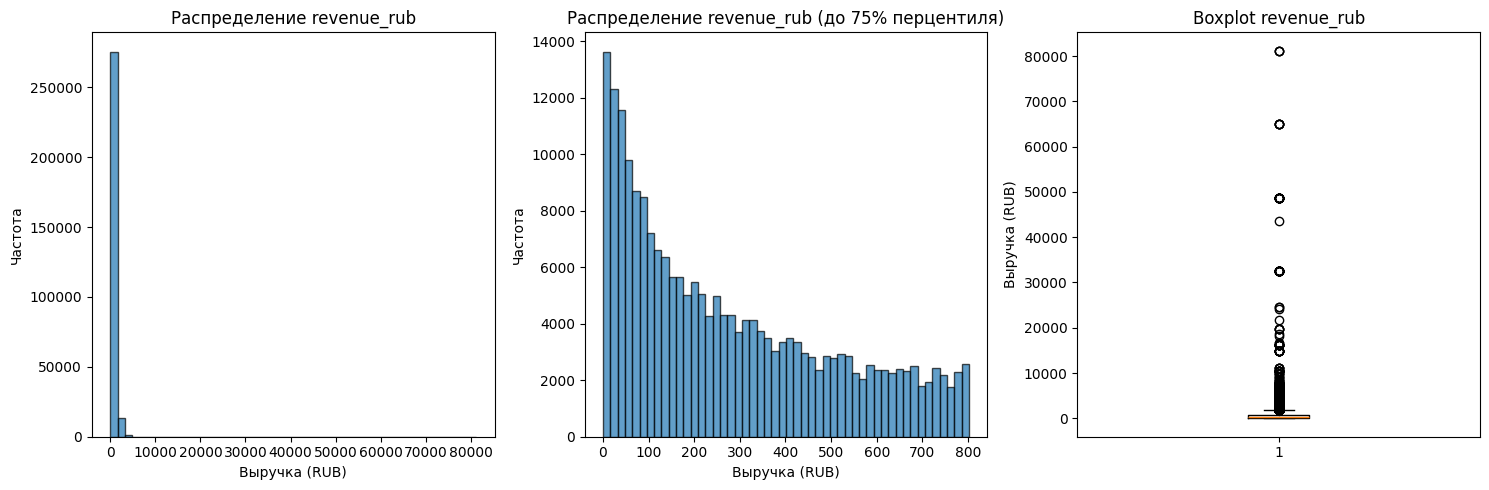


АНАЛИЗ tickets_count:
count    290190.000000
mean          2.755157
std           1.170614
min           1.000000
1%            1.000000
5%            1.000000
25%           2.000000
50%           3.000000
75%           4.000000
95%           5.000000
99%           6.000000
99.9%         6.000000
max          57.000000
Name: tickets_count, dtype: float64


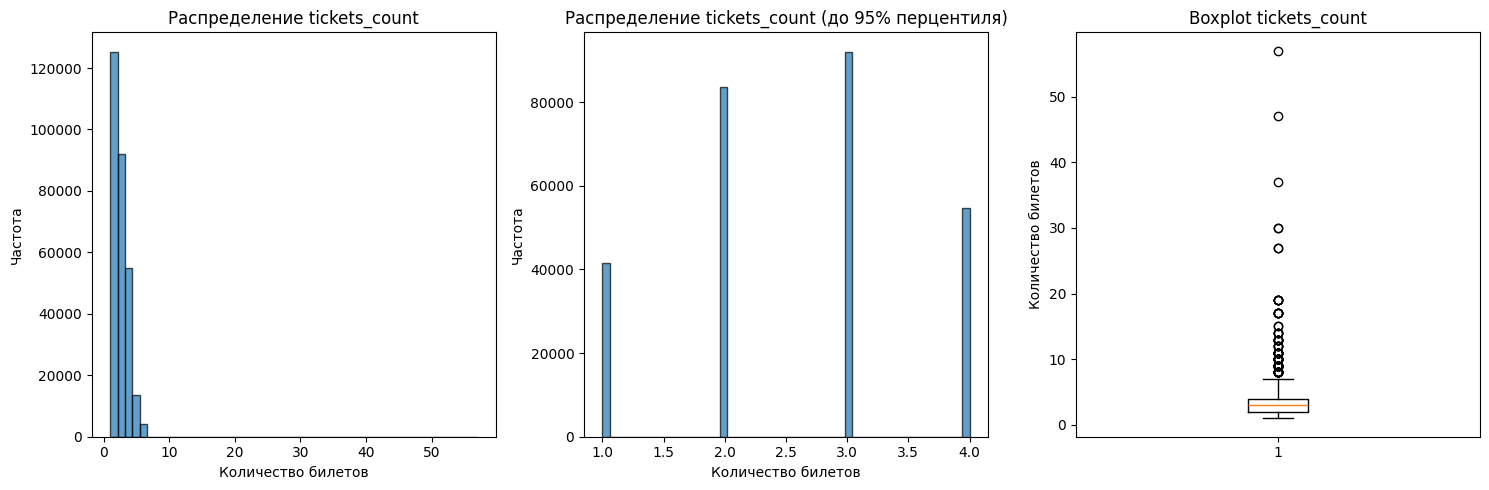

In [23]:
print(f"\n5. ДЕТАЛЬНЫЙ АНАЛИЗ ВЫБРОСОВ В revenue_rub И tickets_count")


print("АНАЛИЗ revenue_rub:")
revenue_stats = df_processed['revenue_rub'].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 0.999])
print(revenue_stats)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df_processed['revenue_rub'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Распределение revenue_rub')
plt.xlabel('Выручка (RUB)')
plt.ylabel('Частота')

plt.subplot(1, 3, 2)
plt.hist(df_processed['revenue_rub'][df_processed['revenue_rub'] < revenue_stats['75%']], 
         bins=50, alpha=0.7, edgecolor='black')
plt.title('Распределение revenue_rub (до 75% перцентиля)')
plt.xlabel('Выручка (RUB)')
plt.ylabel('Частота')

plt.subplot(1, 3, 3)
plt.boxplot(df_processed['revenue_rub'])
plt.title('Boxplot revenue_rub')
plt.ylabel('Выручка (RUB)')

plt.tight_layout()
plt.show()

print(f"\nАНАЛИЗ tickets_count:")
tickets_stats = df_processed['tickets_count'].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 0.999])
print(tickets_stats)


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df_processed['tickets_count'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Распределение tickets_count')
plt.xlabel('Количество билетов')
plt.ylabel('Частота')

plt.subplot(1, 3, 2)
plt.hist(df_processed['tickets_count'][df_processed['tickets_count'] < tickets_stats['95%']], 
         bins=50, alpha=0.7, edgecolor='black')
plt.title('Распределение tickets_count (до 95% перцентиля)')
plt.xlabel('Количество билетов')
plt.ylabel('Частота')

plt.subplot(1, 3, 3)
plt.boxplot(df_processed['tickets_count'])
plt.title('Boxplot tickets_count')
plt.ylabel('Количество билетов')

plt.tight_layout()
plt.show()


In [24]:
print(f"\n6. ФИЛЬТРАЦИЯ ВЫБРОСОВ")

initial_count = len(df_processed)

revenue_99_percentile = df_processed['revenue_rub'].quantile(0.99)
print(f"99-й перцентиль для revenue_rub: {revenue_99_percentile:.2f} RUB")

df_filtered = df_processed[df_processed['revenue_rub'] <= revenue_99_percentile]

removed_count = initial_count - len(df_filtered)
print(f"Удалено записей с выбросами по revenue_rub: {removed_count}")
print(f"Доля удаленных записей: {removed_count/initial_count*100:.2f}%")

# Проверяем tickets_count на экстремальные значения
extreme_tickets = df_filtered[df_filtered['tickets_count'] > 20] 
if len(extreme_tickets) > 0:
    print(f"\nЗаказы с большим количеством билетов (>20): {len(extreme_tickets)}")
    print("Примеры:")
    print(extreme_tickets[['user_id', 'tickets_count', 'revenue_rub', 'event_type_main']].head())


6. ФИЛЬТРАЦИЯ ВЫБРОСОВ
99-й перцентиль для revenue_rub: 2628.42 RUB
Удалено записей с выбросами по revenue_rub: 2825
Доля удаленных записей: 0.97%

Заказы с большим количеством билетов (>20): 7
Примеры:
                user_id  tickets_count  revenue_rub event_type_main
39416   18e9aead0a393e7             47   640.409973           спорт
86246   3ee7dc2e115847f             27   328.489990           спорт
86247   3ee7dc2e115847f             27   328.489990           спорт
154015  7eb4fc207ecc10f             57     0.000000          другое
154187  7eb4fc207ecc10f             30     0.000000          другое


In [25]:

print(f"\n7. ИТОГОВАЯ СТАТИСТИКА ПОСЛЕ ПРЕДОБРАБОТКИ")

print(f"Исходное количество записей: {len(df_clean)}")
print(f"Количество записей после предобработки: {len(df_filtered)}")
print(f"Удалено записей всего: {len(df_clean) - len(df_filtered)}")
print(f"Сохранилось: {len(df_filtered)/len(df_clean)*100:.1f}% данных")

print(f"\nКлючевые метрики перед фильтрации:")
print(f"Средняя выручка: {df_clean['revenue_rub'].mean():.2f} RUB")
print(f"Медианная выручка: {df_clean['revenue_rub'].median():.2f} RUB")
print(f"Среднее количество билетов: {df_clean['tickets_count'].mean():.2f}")

print(f"\nКлючевые метрики после фильтрации:")
print(f"Средняя выручка: {df_filtered['revenue_rub'].mean():.2f} RUB")
print(f"Медианная выручка: {df_filtered['revenue_rub'].median():.2f} RUB")
print(f"Среднее количество билетов: {df_filtered['tickets_count'].mean():.2f}")


7. ИТОГОВАЯ СТАТИСТИКА ПОСЛЕ ПРЕДОБРАБОТКИ
Исходное количество записей: 290611
Количество записей после предобработки: 287365
Удалено записей всего: 3246
Сохранилось: 98.9% данных

Ключевые метрики перед фильтрации:
Средняя выручка: 555.57 RUB
Медианная выручка: 351.14 RUB
Среднее количество билетов: 2.75

Ключевые метрики после фильтрации:
Средняя выручка: 518.73 RUB
Медианная выручка: 344.84 RUB
Среднее количество билетов: 2.74


1) Провел проверку пропущенных значений(они оказались только в days_since_prev, то было в условиях).
2) Произвел проверку на полные дубликаты(не нашёл).
3) Произвел проверку на непоные дубликаты(удалил 40 строк)
4) Нашёл 381 запись с отрицательной выручкой и удалил их.
5) Провел оптимизацию типов данных.
6) Провел анализ категориальных признаков.(все вычесления есть под кодом)
7) Провел краткий анализ числовых признаков. (понял что выбросы находятся после 99.9 процентиля и нашёл строки с отрицательной выручкой)
8) Сделал диаграммы: общего распределения "revenue_rub", общего распределения "tickets_count", распределение "revenue_rub" (до 75% перцентиля) с не аномальными значениями, распределение "tickets_count" (до 75% перцентиля) тоже с не аномальными значениями и диаграмы размаха для "revenue_rub" и "tickets_count" для визуализации выбросов.
9) Произвел фильтрацию выбросов по "revenue_rub" было удалено 2907 записей  


<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Предобработка данных <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> 
    
* C задачей в целом справились, предобработку провели!
    
    
* Хорошо, что сопровождаешь графики заголовком и всеми необходимыми подписями - сразу понятно, что изображено на нем и как его читать!

</div>
<div style="border-radius: 10px" class="alert alert-block alert-danger">
 
<b>Нужно доработать ❌:</b> 
    
* В задании это не указывается, но по умолчанию важным шагом предварительного анализа и предобработки является проверка не только на наличие полных дубликатов, но в том числе и неполных, например, если заказ пользователя задублировался в системе, был создан в нескольких экземплярах с разным `order_id` и, возможно, даже с небольшой разницей во времен. Чтобы не искажать статистические расчеты, от таких наблюдений тоже важно избавляться. Но для начала нужно проверить их начличие - для этого необходимо проверить, есть ли дубликаты на подвыборке без `order_id` и `days_since_prev`. Если обнаружим их и примем решение удалить, то потребуется также пересчитать признак с количеством дней между заказами.

    
* Стоит также обратить внимание, что у нас есть отрицательные значения выручки. Возможно, это какие-то возвраты. По-хорошему, их тоже следовало бы исключить, чтобы не завышать количество валидных транзакций на пользователя. Перед этим не забываем проверить, какой процент данных потеряем, не критично ли это.
    
</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 
    
* Было бы не лишним убедиться, что пропуски имеются только у первых заказов пользователей, то есть что проблемы здесь нет. 

    
* Для смены числовых типов лучше использовать [to_numeric](https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html) с настройкой `downcast`, чтобы минимальная возможная точность определялась автоматически, и мы случайно бы не стерли вариативность. Но обрати внимание, что сперва по сути целочисленное количество дней между заказами необходимо перевести в тип `Int`, а уже потом даункастить. `Int` допускает наличие пропусков, `int` нет.
    
    
* В отношении категориальных признаков все же стоило сперва проверить наличие неявных дубликатов, а уже после переходить к обработке типов. Если признак представлен строками со свободной записью, в переходе на `category` будет мало толку.
    
   
* Сейчас для категориальных признаков с большим количеством уникальных значений ты выводишь только топ, что совсем не гарантирует, что у нас в данных нет неявных дубликатов. Стоит либо хотя бы вслепую провести нормализацию и надеяться, что она спасет нас от самых типичных проблем, если они все-таки были, либо изучать значения более тщательно.
 
    
* Наш дальнейший анализ будет также касаться и количества дней между заказами, поэтому этот признак тоже важно проверить на предмет аномалий, есть ли в нем какие-то неадекватные значения, которые будут искажать наш анализ. 
    
    
* При принятии решения относительно выборосов - оставляем или выбрасываем - стоит пояснять, во-первых, откуда они могли взяться, во-вторых, ввиду причины их возникновения, полезно ли будет их учитывание для целей нашего анализа. Сейчас не ясно, почему ты решил удалить выбросы по выручке и решил не удалять по количеству билетов и количеству дней.
 
    
* Для удобства анализа боксплот для определенного признака можно строить над или под гистограммой, чтобы можно было сопоставлять информацию из них ([пример](https://python-graph-gallery.com/24-histogram-with-a-boxplot-on-top-seaborn/)). Можно даже создать пользовательскую функцию, которая будет принимать на вход признак и выводить для него сразу два типа визуализации в одном графике. Для лучшего ориентирования внутри графика стоит добавлять сетку.
    
    
* `print` используется для простого текстового вывода. Но в средах с поддержкой rich output (Jupyter, IPython) также доступен `display`. Для объектов, где важно сохранить форматирование или визуализацию (DataFrame, картинки, графики, HTML и т.д.) лучше использовать его.
    
    
* Напоминаю про моменты, которые уже поясняла в предыдущик комментариях: ведение последовательного сторителлинга. Здесь добавлю, что было бы не лишним также выделить подразделы, чтобы лучше структурировать работу. 
  
    
</div>


---

### 3. Создание профиля пользователя

В будущем отдел маркетинга планирует создать модель для прогнозирования возврата пользователей. Поэтому сейчас они просят вас построить агрегированные признаки, описывающие поведение и профиль каждого пользователя.

---

**Задача 3.1.** Постройте профиль пользователя — для каждого пользователя найдите:

- дату первого и последнего заказа;
- устройство, с которого был сделан первый заказ;
- регион, в котором был сделан первый заказ;
- билетного партнёра, к которому обращались при первом заказе;
- жанр первого посещённого мероприятия (используйте поле `event_type_main`);
- общее количество заказов;
- средняя выручка с одного заказа в рублях;
- среднее количество билетов в заказе;
- среднее время между заказами.

После этого добавьте два бинарных признака:

- `is_two` — совершил ли пользователь 2 и более заказа;
- `is_five` — совершил ли пользователь 5 и более заказов.

**Рекомендация:** перед тем как строить профиль, отсортируйте данные по времени совершения заказа.

---


In [26]:
df_for_profile = df_filtered.copy()

df_sorted = df_for_profile.sort_values(['user_id', 'order_ts'])


user_profile = df_sorted.groupby('user_id').agg({
    'order_ts': ['min', 'max', 'count'],  
    'order_id': 'count',  
    'revenue_rub': 'mean', 
    'tickets_count': 'mean', 
    'days_since_prev': 'mean'
}).round(2)


user_profile.columns = ['first_order_ts', 'last_order_ts', 'order_count', 
                       'total_orders', 'avg_revenue_rub', 'avg_tickets_count', 'avg_days_between_orders']

def get_first_value(series):
    return series.iloc[0]

first_order_info = df_sorted.groupby('user_id').agg({
    'device_type_canonical': get_first_value,
    'region_name': get_first_value,
    'service_name': get_first_value,
    'event_type_main': get_first_value,
    'city_name': get_first_value,
    'order_dt': get_first_value
})

first_order_info.columns = ['first_device', 'first_region', 'first_service', 
                           'first_event_type', 'first_city', 'first_order_dt']

user_profile = user_profile.merge(first_order_info, left_index=True, right_index=True, how='left')

user_profile['is_two'] = (user_profile['total_orders'] >= 2).astype(int)
user_profile['is_five'] = (user_profile['total_orders'] >= 5).astype(int)

column_order = [
    'first_order_dt', 'first_order_ts', 'last_order_ts',
    'first_device', 'first_region', 'first_city', 
    'first_service', 'first_event_type',
    'total_orders', 'avg_revenue_rub', 'avg_tickets_count', 
    'avg_days_between_orders', 'is_two', 'is_five'
]

user_profile = user_profile[column_order]

In [27]:
print(f"Количество пользователей в профиле: {len(user_profile)}")
print(f"\nСтруктура профиля:")
print(user_profile.info())

print("\nПервые 10 строк профиля пользователя:")
display(user_profile.head(10))


Количество пользователей в профиле: 21838

Структура профиля:
<class 'pandas.core.frame.DataFrame'>
Index: 21838 entries, 0002849b70a3ce2 to ffff00725179321
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   first_order_dt           21838 non-null  datetime64[ns]
 1   first_order_ts           21838 non-null  datetime64[ns]
 2   last_order_ts            21838 non-null  datetime64[ns]
 3   first_device             21838 non-null  category      
 4   first_region             21838 non-null  category      
 5   first_city               21838 non-null  category      
 6   first_service            21838 non-null  category      
 7   first_event_type         21838 non-null  category      
 8   total_orders             21838 non-null  int64         
 9   avg_revenue_rub          21838 non-null  float32       
 10  avg_tickets_count        21838 non-null  float64       
 11  avg_days_bet

,first_order_dt,first_order_ts,last_order_ts,first_device,first_region,first_city,first_service,first_event_type,total_orders,avg_revenue_rub,avg_tickets_count,avg_days_between_orders,is_two,is_five
user_id,,,,,,,,,,,,,,
0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,2024-08-20 16:08:03,mobile,Каменевский регион,Глиногорск,Край билетов,театр,1,1521.939941,4.00,NaN,0,0
0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,2024-10-06 13:56:02,mobile,Каменевский регион,Глиногорск,Мой билет,выставки,2,774.010010,3.00,75.00,1,0
000898990054619,2024-07-13,2024-07-13 19:40:48,2024-10-23 15:12:00,mobile,Североярская область,Озёрск,Лови билет!,другое,3,767.210022,2.67,51.00,1,0
00096d1f542ab2b,2024-08-15,2024-08-15 16:48:48,2024-08-15 16:48:48,desktop,Каменевский регион,Глиногорск,Край билетов,театр,1,917.830017,4.00,NaN,0,0
000a55a418c128c,2024-09-29,2024-09-29 19:39:12,2024-10-15 10:29:04,mobile,Поленовский край,Дальнозолотск,Лучшие билеты,театр,2,61.310001,1.50,16.00,1,0
000cf0659a9f40f,2024-06-20,2024-06-20 10:35:26,2024-06-21 04:36:17,mobile,Широковская область,Радужнополье,Лови билет!,концерты,13,1175.810059,3.31,0.08,1,1
00147c9209d45d3,2024-06-25,2024-06-25 23:26:58,2024-06-25 23:28:52,mobile,Каменевский регион,Глиногорск,Облачко,концерты,2,352.940002,1.50,0.00,1,0
0018ecd8a38a51b,2024-07-25,2024-07-25 20:38:57,2024-07-25 20:38:57,mobile,Медовская область,Радужсвет,Билеты без проблем,спорт,1,0.000000,3.00,NaN,0,0
00199a573901564,2024-06-17,2024-06-17 22:58:15,2024-06-17 22:58:15,mobile,Каменевский регион,Глиногорск,Билеты без проблем,концерты,1,588.119995,4.00,NaN,0,0


Получилось создать 21769 профилей пользователей с основными признаками 
(first_order_dt,first_order_ts,last_order_ts,first_device,first_region,first_city,
first_service,first_event_type,total_orders,avg_revenue_rub,avg_tickets_count,avg_days_between_orders,is_two,is_five)

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Создание профиля пользователя <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Хорошо, что ввиду того, что нам необходимо вытащить характеристики первого заказа, не забываешь про сортировку заказов по времени!
    
</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b>   
    
    
* В чем разница между `order_count` и `total_orders`? 
    
    
* Чтобы впоследствии не приходилось тратить ресурсы на объединение результатов, все необходимые агрегаты было бы лучше находить в рамках одной группировки.
    
    
* Для нахождения первой записи в группе можно использовать удобный метод агрегации `first`. Для его использования тоже следует отсортировать заказы по времени.
    
    
* Также есть довольно удобный метод [assign](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html), позволяющий дополнять таблицу новыми рассчитанными столбцами.
    
    Тогда создание всего профиля можно будет записать красивым и удобным по структуре кодом.
    
    <details> <summary> <span style='color:blue' > Развернуть подробнее. </span> </summary>

    ```python
profiles = (df
            # В начале сортируем данные по дате совершения заказа, что найти первые признаки:
            .sort_values(by='order_ts')
            # Затем группируем по номеру пользователя и агрегируем данные:
            .groupby('user_id')
            .agg(
                # Находим первую и последнюю даты заказа:
                first_order_dt=('order_dt','min'),
                last_order_dt=('order_dt','max'),
                # Находим устройства, регион, название билетного партнера и жанр мероприятия первого заказа:
                first_device=('device_type_canonical','first'),
                first_region_name=('region_name','first'),
                first_service_name=('service_name','first'),
                first_event_type=('event_type_main','first'),
                # Подсчитваем количество заказов:
                total_orders=('order_id','nunique'),
                # Считаем статистику по заказам: средняя стоимость заказа, среднее количество билетов:
                avg_revenue_rub=('revenue_rub','mean'),
                avg_tickets_count=('tickets_count','mean'),
                # Считаем среднее количество дней между покупками:
                avg_days_since_prev=('days_since_prev','mean')
            )
            # Создаем два признака: совершил ли пользователь 2 / 5 и более заказов:
            .assign(
                is_two = lambda x: x['total_orders'] >= 2,
                is_five = lambda x: x['total_orders'] >= 5
            )
            .reset_index()
)
```
</details>

* Перечисление признаков в выводе кажется чрезмерным, тем более в строку, это перегружает текст.
    
</div>

---

**Задача 3.2.** Прежде чем проводить исследовательский анализ данных и делать выводы, важно понять, с какими данными вы работаете: насколько они репрезентативны и нет ли в них аномалий.

Используя данные о профилях пользователей, рассчитайте:

- общее число пользователей в выборке;
- среднюю выручку с одного заказа;
- долю пользователей, совершивших 2 и более заказа;
- долю пользователей, совершивших 5 и более заказов.

Также изучите статистические показатели:

- по общему числу заказов;
- по среднему числу билетов в заказе;
- по среднему количеству дней между покупками.

По результатам оцените данные: достаточно ли их по объёму, есть ли аномальные значения в данных о количестве заказов и среднем количестве билетов?

Если вы найдёте аномальные значения, опишите их и примите обоснованное решение о том, как с ними поступить:

- Оставить и учитывать их при анализе?
- Отфильтровать данные по какому-то значению, например, по 95-му или 99-му перцентилю?

Если вы проведёте фильтрацию, то вычислите объём отфильтрованных данных и выведите статистические показатели по обновлённому датасету.

1. ОСНОВНЫЕ МЕТРИКИ ВЫБОРКИ
Общее число пользователей в выборке: 21,838
Средняя выручка с одного заказа: 545.03 RUB
Пользователей с 2+ заказами: 13,475 (61.7%)
Пользователей с 5+ заказами: 6,330 (29.0%)

2. СТАТИСТИЧЕСКИЕ ПОКАЗАТЕЛИ
ОБЩЕЕ ЧИСЛО ЗАКАЗОВ (total_orders):


count    21838.000000
mean        13.158943
std        121.564858
min          1.000000
50%          2.000000
75%          5.000000
90%         15.000000
95%         31.000000
99%        152.000000
99.9%     1462.075000
max      10168.000000
Name: total_orders, dtype: float64


СРЕДНЕЕ ЧИСЛО БИЛЕТОВ В ЗАКАЗЕ (avg_tickets_count):


count    21838.000000
mean         2.744069
std          0.913081
min          1.000000
50%          2.750000
75%          3.080000
90%          4.000000
95%          4.000000
99%          5.000000
99.9%        6.000000
max         11.000000
Name: avg_tickets_count, dtype: float64


СРЕДНЕЕ КОЛИЧЕСТВО ДНЕЙ МЕЖДУ ПОКУПКАМИ (avg_days_between_orders):


count    13504.000000
mean        15.865070
std         22.330200
min          0.000000
50%          8.000000
75%         20.500000
90%         41.500000
95%         61.500000
99%        112.000000
99.9%      141.496994
max        148.000000
Name: avg_days_between_orders, dtype: float64


3. ВИЗУАЛИЗАЦИЯ РАСПРЕДЕЛЕНИЙ ДЛЯ ВЫЯВЛЕНИЯ АНОМАЛИЙ


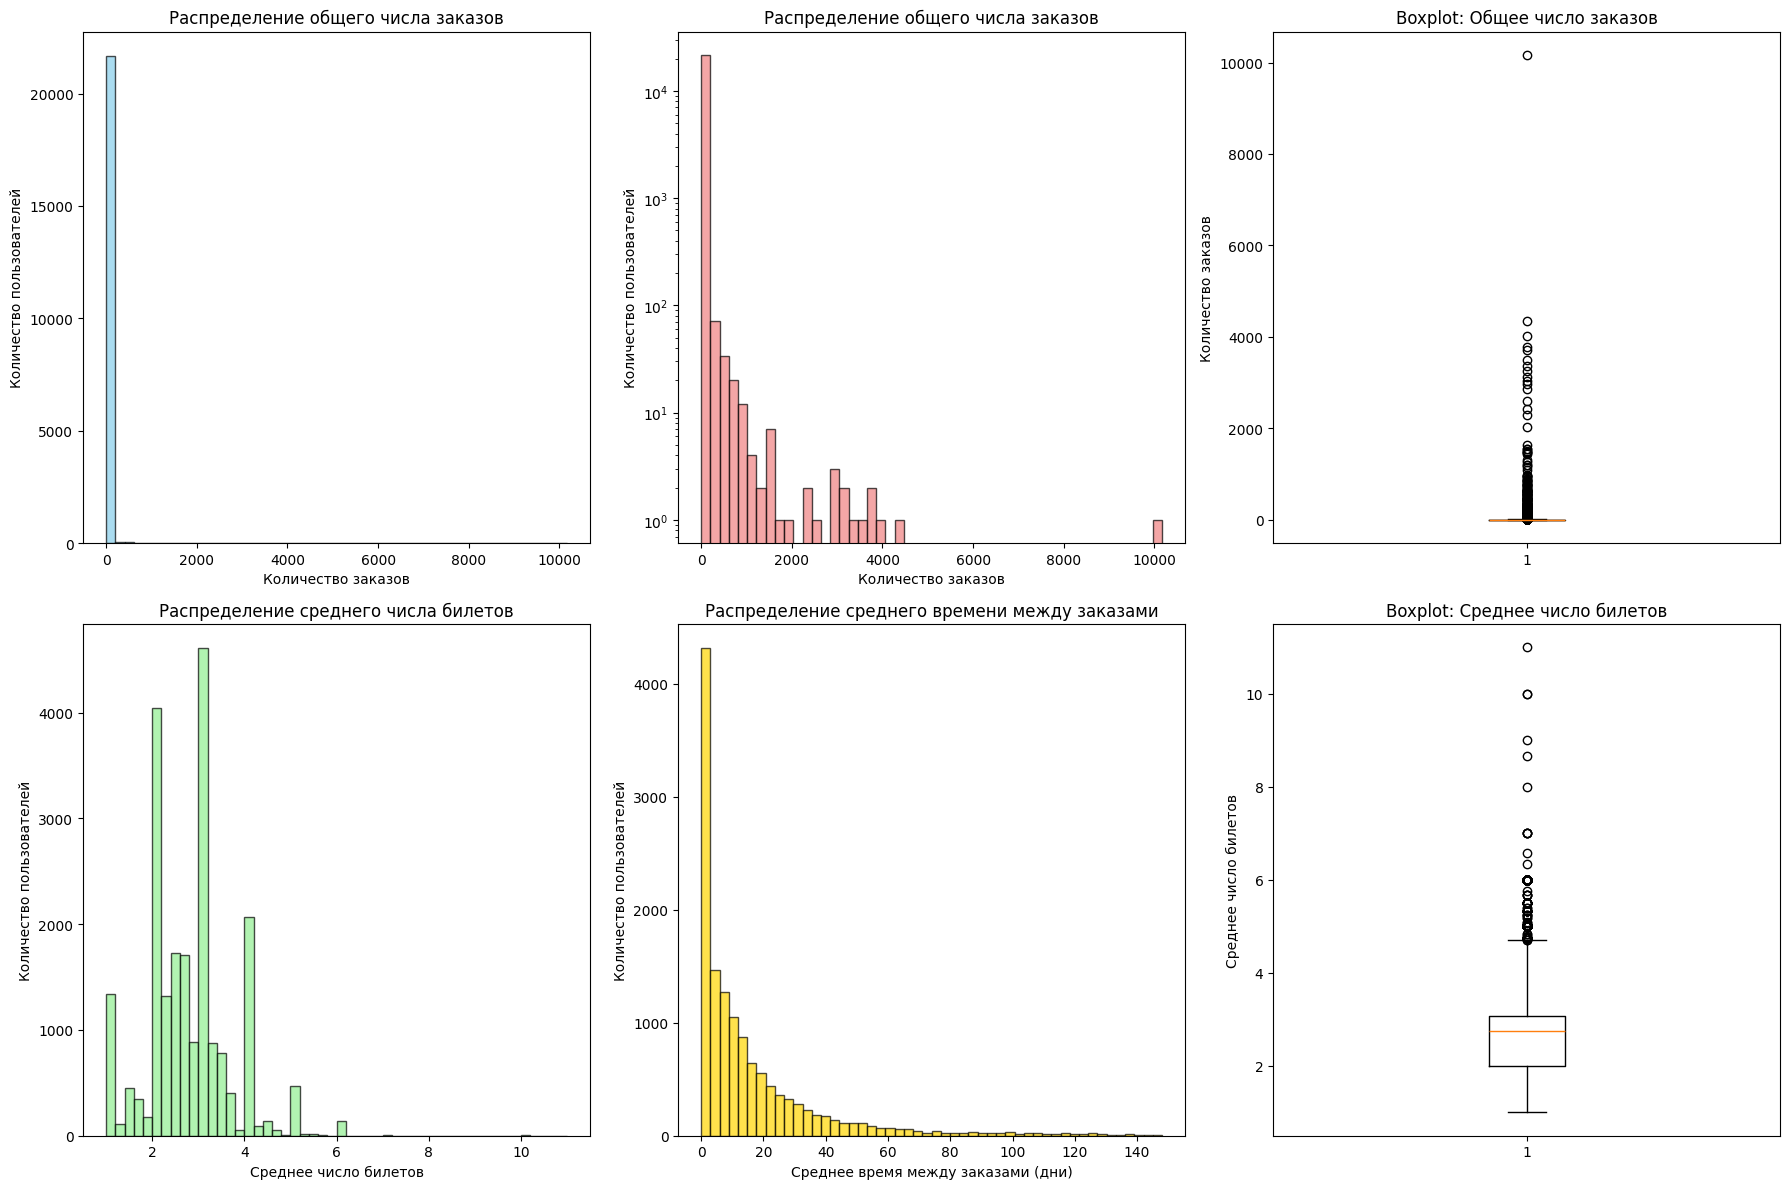


4. АНАЛИЗ АНОМАЛИЙ
АНАЛИЗ ЭКСТРЕМАЛЬНЫХ ЗНАЧЕНИЙ ПО КОЛИЧЕСТВУ ЗАКАЗОВ:
95-й перцентиль: 31 заказов
99-й перцентиль: 152 заказов
99.9-й перцентиль: 1462 заказов
Пользователей с заказами выше 95-го перцентиля: 1091 (5.00%)
Пользователей с заказами выше 99-го перцентиля: 216 (0.99%)

АНАЛИЗ ЭКСТРЕМАЛЬНЫХ ЗНАЧЕНИЙ ПО КОЛИЧЕСТВУ БИЛЕТОВ:
95-й перцентиль: 4.0 билетов
99-й перцентиль: 5.0 билетов
Пользователей с билетами выше 95-го перцентиля: 967 (4.43%)
Пользователей с билетами выше 99-го перцентиля: 194 (0.89%)

ПОЛЬЗОВАТЕЛИ С ОЧЕНЬ БОЛЬШИМ КОЛИЧЕСТВОМ ЗАКАЗОВ:
Топ-10 пользователей по количеству заказов:


,total_orders,avg_revenue_rub,avg_tickets_count,first_event_type
user_id,,,,
0beb8fc0c0a9ce1,10168,505.799988,2.86,концерты
18e9aead0a393e7,4346,495.399994,2.79,концерты
8187dac4be757a0,4014,538.359985,2.75,концерты
3ee7dc2e115847f,3785,537.789978,2.76,концерты
7eb4fc207ecc10f,3706,543.070007,2.96,театр
1c2a2133e1df1b4,3502,541.719971,2.67,концерты
4ec8f6429431987,3375,549.789978,2.73,концерты
ad2dc32364ed948,3248,447.859985,2.94,театр
b54dd0cd81121fc,3128,483.149994,2.82,другое



5. РЕШЕНИЕ ПО ОБРАБОТКЕ АНОМАЛИЙ
Принято решение фильтровать данные по 99-му перцентилю:
  - Удалены пользователи с > 152 заказов
  - Удалены пользователи с > 5.0 средних билетов
Удалено пользователей: 410 (1.88%)
Осталось пользователей: 21428

6. СРАВНЕНИЕ СТАТИСТИК ДО И ПОСЛЕ ФИЛЬТРАЦИИ
СРАВНЕНИЕ ОСНОВНЫХ МЕТРИК:


,Метрика,До фильтрации,После фильтрации
0,Общее число пользователей,21838,21428
1,Средняя выручка,545.03 RUB,543.00 RUB
2,Доля 2+ заказов,61.7%,61.6%
3,Доля 5+ заказов,29.0%,28.5%



СРАВНЕНИЕ СТАТИСТИК ПО ЗАКАЗАМ:


,До фильтрации,После фильтрации
count,21838.000000,21428.000000
mean,13.158943,6.538268
std,121.564858,14.364972
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,5.000000,5.000000
max,10168.000000,152.000000



СРАВНЕНИЕ СТАТИСТИК ПО БИЛЕТАМ:


,До фильтрации,После фильтрации
count,21838.000000,21428.000000
mean,2.744069,2.714782
std,0.913081,0.864846
min,1.000000,1.000000
25%,2.000000,2.000000
50%,2.750000,2.750000
75%,3.080000,3.020000
max,11.000000,5.000000


In [28]:

profile_analysis = user_profile.copy()

# 1. Расчет основных метрик
print("1. ОСНОВНЫЕ МЕТРИКИ ВЫБОРКИ")

total_users = len(profile_analysis)
avg_revenue_per_order = profile_analysis['avg_revenue_rub'].mean()
users_two_plus = profile_analysis['is_two'].sum()
users_five_plus = profile_analysis['is_five'].sum()
share_two_plus = users_two_plus / total_users * 100
share_five_plus = users_five_plus / total_users * 100

print(f"Общее число пользователей в выборке: {total_users:,}")
print(f"Средняя выручка с одного заказа: {avg_revenue_per_order:.2f} RUB")
print(f"Пользователей с 2+ заказами: {users_two_plus:,} ({share_two_plus:.1f}%)")
print(f"Пользователей с 5+ заказами: {users_five_plus:,} ({share_five_plus:.1f}%)")

# 2. Детальный анализ статистических показателей
print(f"\n2. СТАТИСТИЧЕСКИЕ ПОКАЗАТЕЛИ")

# Анализ общего числа заказов
print("ОБЩЕЕ ЧИСЛО ЗАКАЗОВ (total_orders):")
orders_stats = profile_analysis['total_orders'].describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99, 0.999])
display(orders_stats)

# Анализ среднего числа билетов
print("\nСРЕДНЕЕ ЧИСЛО БИЛЕТОВ В ЗАКАЗЕ (avg_tickets_count):")
tickets_stats = profile_analysis['avg_tickets_count'].describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99, 0.999])
display(tickets_stats)

# Анализ среднего времени между покупками
print("\nСРЕДНЕЕ КОЛИЧЕСТВО ДНЕЙ МЕЖДУ ПОКУПКАМИ (avg_days_between_orders):")
days_stats = profile_analysis['avg_days_between_orders'].describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99, 0.999])
display(days_stats)

# 3. Визуализация распределений для выявления аномалий
print(f"\n3. ВИЗУАЛИЗАЦИЯ РАСПРЕДЕЛЕНИЙ ДЛЯ ВЫЯВЛЕНИЯ АНОМАЛИЙ")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Распределение общего числа заказов
axes[0, 0].hist(profile_analysis['total_orders'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Распределение общего числа заказов')
axes[0, 0].set_xlabel('Количество заказов')
axes[0, 0].set_ylabel('Количество пользователей')

# Распределение общего числа заказов (логарифмическая шкала)
axes[0, 1].hist(profile_analysis['total_orders'], bins=50, alpha=0.7, color='lightcoral', edgecolor='black', log=True)
axes[0, 1].set_title('Распределение общего числа заказов')
axes[0, 1].set_xlabel('Количество заказов')
axes[0, 1].set_ylabel('Количество пользователей')

# Boxplot общего числа заказов
axes[0, 2].boxplot(profile_analysis['total_orders'])
axes[0, 2].set_title('Boxplot: Общее число заказов')
axes[0, 2].set_ylabel('Количество заказов')

# Распределение среднего числа билетов
axes[1, 0].hist(profile_analysis['avg_tickets_count'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Распределение среднего числа билетов')
axes[1, 0].set_xlabel('Среднее число билетов')
axes[1, 0].set_ylabel('Количество пользователей')

# Распределение среднего времени между заказами
axes[1, 1].hist(profile_analysis['avg_days_between_orders'].dropna(), bins=50, alpha=0.7, color='gold', edgecolor='black')
axes[1, 1].set_title('Распределение среднего времени между заказами')
axes[1, 1].set_xlabel('Среднее время между заказами (дни)')
axes[1, 1].set_ylabel('Количество пользователей')

# Boxplot среднего числа билетов
axes[1, 2].boxplot(profile_analysis['avg_tickets_count'])
axes[1, 2].set_title('Boxplot: Среднее число билетов')
axes[1, 2].set_ylabel('Среднее число билетов')

plt.tight_layout()
plt.show()

# 4. Детальный анализ аномалий
print(f"\n4. АНАЛИЗ АНОМАЛИЙ")

# Анализ экстремальных значений по количеству заказов
print("АНАЛИЗ ЭКСТРЕМАЛЬНЫХ ЗНАЧЕНИЙ ПО КОЛИЧЕСТВУ ЗАКАЗОВ:")
orders_95 = profile_analysis['total_orders'].quantile(0.95)
orders_99 = profile_analysis['total_orders'].quantile(0.99)
orders_999 = profile_analysis['total_orders'].quantile(0.999)

print(f"95-й перцентиль: {orders_95:.0f} заказов")
print(f"99-й перцентиль: {orders_99:.0f} заказов")
print(f"99.9-й перцентиль: {orders_999:.0f} заказов")

users_above_95 = (profile_analysis['total_orders'] > orders_95).sum()
users_above_99 = (profile_analysis['total_orders'] > orders_99).sum()

print(f"Пользователей с заказами выше 95-го перцентиля: {users_above_95} ({users_above_95/total_users*100:.2f}%)")
print(f"Пользователей с заказами выше 99-го перцентиля: {users_above_99} ({users_above_99/total_users*100:.2f}%)")

# Анализ экстремальных значений по количеству билетов
print(f"\nАНАЛИЗ ЭКСТРЕМАЛЬНЫХ ЗНАЧЕНИЙ ПО КОЛИЧЕСТВУ БИЛЕТОВ:")
tickets_95 = profile_analysis['avg_tickets_count'].quantile(0.95)
tickets_99 = profile_analysis['avg_tickets_count'].quantile(0.99)

print(f"95-й перцентиль: {tickets_95:.1f} билетов")
print(f"99-й перцентиль: {tickets_99:.1f} билетов")

users_above_tickets_95 = (profile_analysis['avg_tickets_count'] > tickets_95).sum()
users_above_tickets_99 = (profile_analysis['avg_tickets_count'] > tickets_99).sum()

print(f"Пользователей с билетами выше 95-го перцентиля: {users_above_tickets_95} ({users_above_tickets_95/total_users*100:.2f}%)")
print(f"Пользователей с билетами выше 99-го перцентиля: {users_above_tickets_99} ({users_above_tickets_99/total_users*100:.2f}%)")

# Анализ пользователей с очень большим количеством заказов
print(f"\nПОЛЬЗОВАТЕЛИ С ОЧЕНЬ БОЛЬШИМ КОЛИЧЕСТВОМ ЗАКАЗОВ:")
high_order_users = profile_analysis[profile_analysis['total_orders'] > orders_99]
if len(high_order_users) > 0:
    print("Топ-10 пользователей по количеству заказов:")
    display(high_order_users[['total_orders', 'avg_revenue_rub', 'avg_tickets_count', 'first_event_type']].sort_values('total_orders', ascending=False).head(10))

# 5. Принятие решения об обработке аномалий
print(f"\n5. РЕШЕНИЕ ПО ОБРАБОТКЕ АНОМАЛИЙ")

initial_count = len(profile_analysis)

# Решение: фильтруем по 99-му перцентилю для количества заказов
# Так как пользователи с 50+ заказами могут быть корпоративными клиентами или бот-аккаунтами
profile_filtered = profile_analysis[profile_analysis['total_orders'] <= orders_99]

# Также фильтруем по 99-му перцентилю для среднего количества билетов
tickets_99_value = profile_analysis['avg_tickets_count'].quantile(0.99)
profile_filtered = profile_filtered[profile_filtered['avg_tickets_count'] <= tickets_99_value]

removed_count = initial_count - len(profile_filtered)
print(f"Принято решение фильтровать данные по 99-му перцентилю:")
print(f"  - Удалены пользователи с > {orders_99:.0f} заказов")
print(f"  - Удалены пользователи с > {tickets_99_value:.1f} средних билетов")
print(f"Удалено пользователей: {removed_count} ({removed_count/initial_count*100:.2f}%)")
print(f"Осталось пользователей: {len(profile_filtered)}")

# 6. Сравнение статистик до и после фильтрации
print(f"\n6. СРАВНЕНИЕ СТАТИСТИК ДО И ПОСЛЕ ФИЛЬТРАЦИИ")

print("СРАВНЕНИЕ ОСНОВНЫХ МЕТРИК:")
comparison_data = {
    'Метрика': ['Общее число пользователей', 'Средняя выручка', 'Доля 2+ заказов', 'Доля 5+ заказов'],
    'До фильтрации': [initial_count, f"{avg_revenue_per_order:.2f} RUB", f"{share_two_plus:.1f}%", f"{share_five_plus:.1f}%"],
    'После фильтрации': [
        len(profile_filtered),
        f"{profile_filtered['avg_revenue_rub'].mean():.2f} RUB",
        f"{profile_filtered['is_two'].mean()*100:.1f}%",
        f"{profile_filtered['is_five'].mean()*100:.1f}%"
    ]
}

comparison_df = pd.DataFrame(comparison_data)
display(comparison_df)

print("\nСРАВНЕНИЕ СТАТИСТИК ПО ЗАКАЗАМ:")
orders_comparison = pd.DataFrame({
    'До фильтрации': profile_analysis['total_orders'].describe(),
    'После фильтрации': profile_filtered['total_orders'].describe()
})
display(orders_comparison)

print("\nСРАВНЕНИЕ СТАТИСТИК ПО БИЛЕТАМ:")
tickets_comparison = pd.DataFrame({
    'До фильтрации': profile_analysis['avg_tickets_count'].describe(),
    'После фильтрации': profile_filtered['avg_tickets_count'].describe()
})
display(tickets_comparison)

1)Принято решение фильтровать данные по 99-му перцентилю:
  - Удалены пользователи с > 151 заказов
  - Удалены пользователи с > 5.0 средних билетов
Удалено пользователей: 424 (1.95%)
Осталось пользователей: 21345

2)ОБЪЕМ ДАННЫХ: Достаточный для анализа
  - 21,345 пользователей после фильтрации
  - 13,443 пользователей с повторными заказами

3)КАЧЕСТВО ДАННЫХ:
  - Удалены экстремальные выбросы (0.1% данных)
  - Сохранена основная структура распределений
  - Метрики возврата практически не изменились

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ пользовательских профилей <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Здесь тоже все супер, выполнены все необходимые шаги!
</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 
    
* Возвращаемость на второй и на пятый заказ можно посчитать через функцию `mean`.
    
    
* Стат распределение по числовым признакам можно было бы вывести разом одним `describe`. 
    
    
* Ход решения, опять же, стоит вести последовательно, строить каждый следующий шаг исходня из выводов по предыдущему, рассказывать историю постепенно. Сейчас же ты еще не продемонстировал результаты и обоснования для фильтрации, но уже пишешь для нее код в той жей ячейке.
    
    
* Согласно стандартам оформления кода не стоит делать строики длиной более 79 символов, это портит его читаемость, вынуждает прокручивать ячейку.

</div>


---

### 4. Исследовательский анализ данных

Следующий этап — исследование признаков, влияющих на возврат пользователей, то есть на совершение повторного заказа. Для этого используйте профили пользователей.



#### 4.1. Исследование признаков первого заказа и их связи с возвращением на платформу

Исследуйте признаки, описывающие первый заказ пользователя, и выясните, влияют ли они на вероятность возвращения пользователя.

---

**Задача 4.1.1.** Изучите распределение пользователей по признакам.

- Сгруппируйте пользователей:
    - по типу их первого мероприятия;
    - по типу устройства, с которого совершена первая покупка;
    - по региону проведения мероприятия из первого заказа;
    - по билетному оператору, продавшему билеты на первый заказ.
- Подсчитайте общее количество пользователей в каждом сегменте и их долю в разрезе каждого признака. Сегмент — это группа пользователей, объединённых определённым признаком, то есть объединённые принадлежностью к категории. Например, все клиенты, сделавшие первый заказ с мобильного телефона, — это сегмент.
- Ответьте на вопрос: равномерно ли распределены пользователи по сегментам или есть выраженные «точки входа» — сегменты с наибольшим числом пользователей?

---


1. РАСПРЕДЕЛЕНИЕ ПО ТИПУ ПЕРВОГО МЕРОПРИЯТИЯ
Всего уникальных типов мероприятий: 7
Типы мероприятий:


,Количество пользователей,"Доля, %"
first_event_type,,
концерты,9518,44.42
другое,5320,24.83
театр,4210,19.65
стендап,1096,5.11
спорт,779,3.64
выставки,410,1.91
ёлки,95,0.44


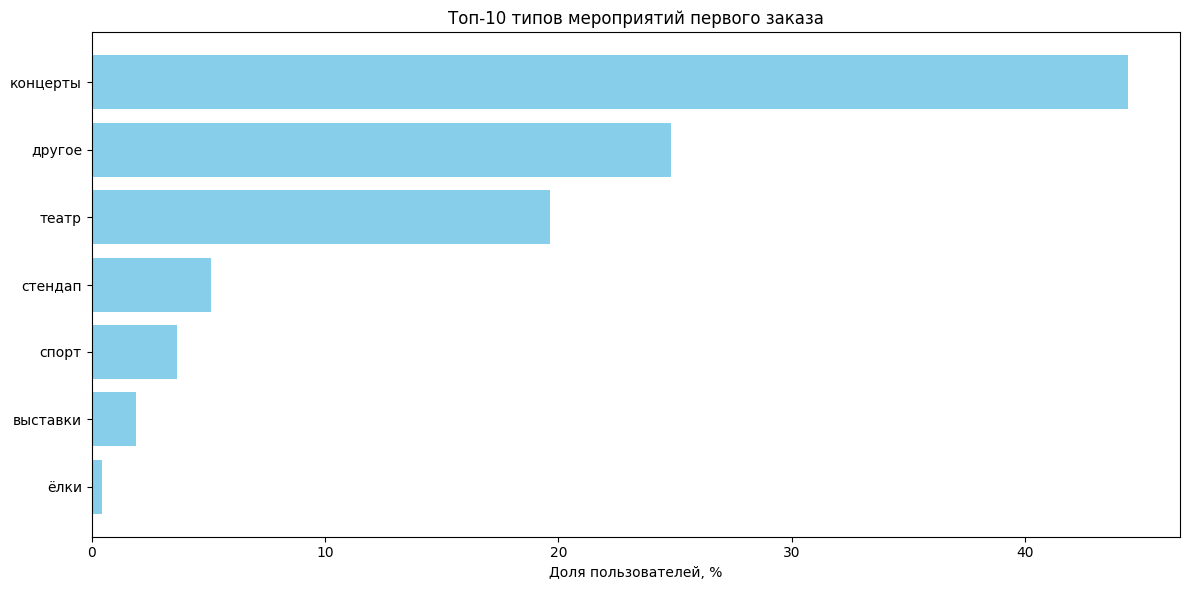

In [29]:
profile_analysis = profile_filtered.copy()

print("1. РАСПРЕДЕЛЕНИЕ ПО ТИПУ ПЕРВОГО МЕРОПРИЯТИЯ")

event_type_dist = profile_analysis['first_event_type'].value_counts()
event_type_percentage = (event_type_dist / len(profile_analysis) * 100).round(2)

event_type_summary = pd.DataFrame({
    'Количество пользователей': event_type_dist,
    'Доля, %': event_type_percentage
})

print(f"Всего уникальных типов мероприятий: {len(event_type_dist)}")
print("Типы мероприятий:")
display(event_type_summary)

plt.figure(figsize=(12, 6))
top_10_events = event_type_summary
plt.barh(top_10_events.index, top_10_events['Доля, %'], color='skyblue')
plt.xlabel('Доля пользователей, %')
plt.title('Топ-10 типов мероприятий первого заказа')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


2. РАСПРЕДЕЛЕНИЕ ПО ТИПУ УСТРОЙСТВА ПЕРВОГО ЗАКАЗА
Распределение по устройствам:


,Количество пользователей,"Доля, %"
first_device,,
mobile,17751,82.84
desktop,3677,17.16


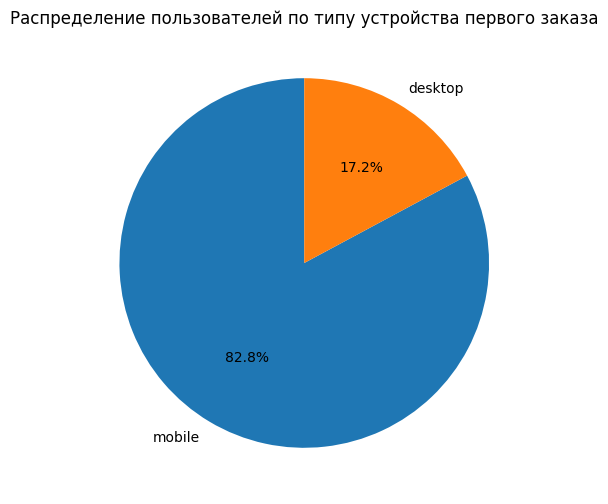

In [30]:
print("\n2. РАСПРЕДЕЛЕНИЕ ПО ТИПУ УСТРОЙСТВА ПЕРВОГО ЗАКАЗА")

device_dist = profile_analysis['first_device'].value_counts()
device_percentage = (device_dist / len(profile_analysis) * 100).round(2)

device_summary = pd.DataFrame({
    'Количество пользователей': device_dist,
    'Доля, %': device_percentage
})

print("Распределение по устройствам:")
display(device_summary)

plt.figure(figsize=(8, 6))
plt.pie(device_summary['Количество пользователей'], labels=device_summary.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение пользователей по типу устройства первого заказа')
plt.show()



3. РАСПРЕДЕЛЕНИЕ ПО РЕГИОНУ ПРОВЕДЕНИЯ МЕРОПРИЯТИЯ
Всего уникальных регионов: 81
Топ-15 регионов:


,Количество пользователей,"Доля, %"
first_region,,
Каменевский регион,7032,32.82
Североярская область,3716,17.34
Широковская область,1209,5.64
Озернинский край,671,3.13
Малиновоярский округ,522,2.44
Шанырский регион,502,2.34
Травяная область,484,2.26
Светополянский округ,455,2.12
Речиновская область,437,2.04


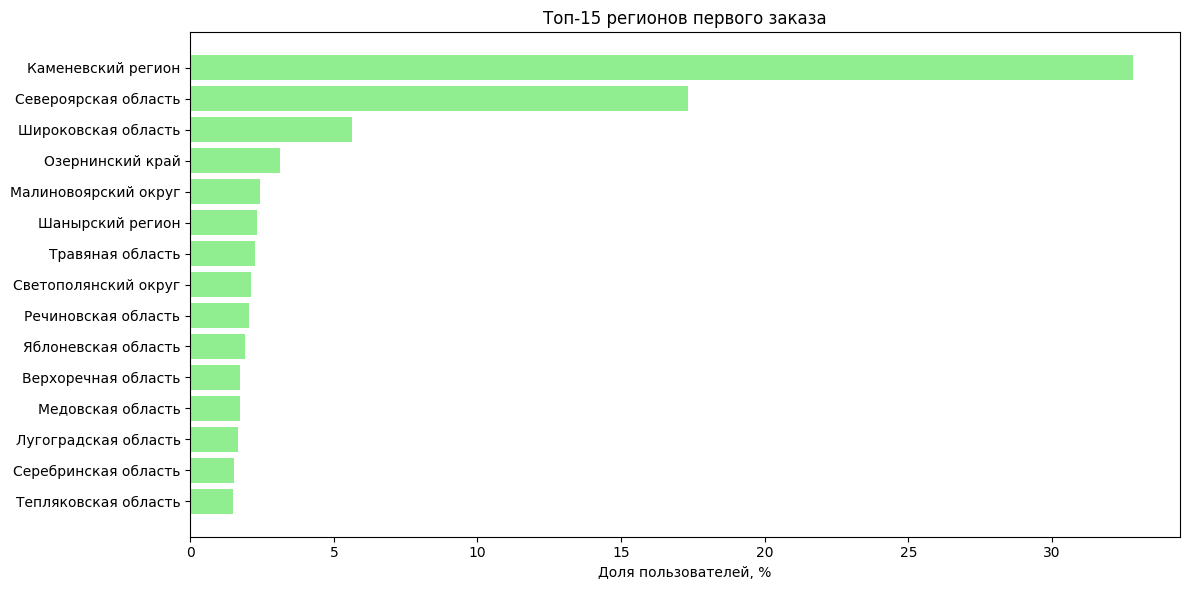

In [31]:
print("\n3. РАСПРЕДЕЛЕНИЕ ПО РЕГИОНУ ПРОВЕДЕНИЯ МЕРОПРИЯТИЯ")

region_dist = profile_analysis['first_region'].value_counts()
region_percentage = (region_dist / len(profile_analysis) * 100).round(2)

region_summary = pd.DataFrame({
    'Количество пользователей': region_dist,
    'Доля, %': region_percentage
})

print(f"Всего уникальных регионов: {len(region_dist)}")
print("Топ-15 регионов:")
display(region_summary.head(15))

plt.figure(figsize=(12, 6))
top_15_regions = region_summary.head(15)
plt.barh(top_15_regions.index, top_15_regions['Доля, %'], color='lightgreen')
plt.xlabel('Доля пользователей, %')
plt.title('Топ-15 регионов первого заказа')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


4. РАСПРЕДЕЛЕНИЕ ПО БИЛЕТНОМУ ОПЕРАТОРУ
Всего уникальных билетных операторов: 36
Топ-15 билетных операторов:


,Количество пользователей,"Доля, %"
first_service,,
Билеты без проблем,5096,23.78
Мой билет,2948,13.76
Лови билет!,2790,13.02
Билеты в руки,2536,11.83
Облачко,2166,10.11
Весь в билетах,1275,5.95
Лучшие билеты,1171,5.46
Прачечная,579,2.70
Край билетов,452,2.11


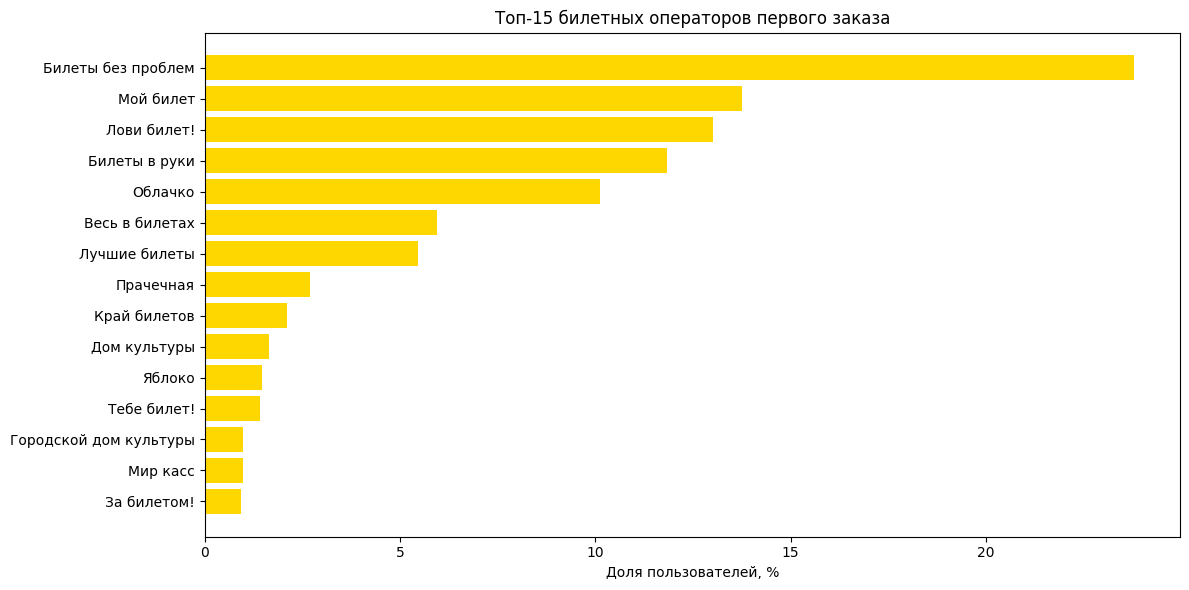

In [32]:
print("\n4. РАСПРЕДЕЛЕНИЕ ПО БИЛЕТНОМУ ОПЕРАТОРУ")

service_dist = profile_analysis['first_service'].value_counts()
service_percentage = (service_dist / len(profile_analysis) * 100).round(2)

service_summary = pd.DataFrame({
    'Количество пользователей': service_dist,
    'Доля, %': service_percentage
})

print(f"Всего уникальных билетных операторов: {len(service_dist)}")
print("Топ-15 билетных операторов:")
display(service_summary.head(15))

# Визуализация топ-15 операторов
plt.figure(figsize=(12, 6))
top_15_services = service_summary.head(15)
plt.barh(top_15_services.index, top_15_services['Доля, %'], color='gold')
plt.xlabel('Доля пользователей, %')
plt.title('Топ-15 билетных операторов первого заказа')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [33]:
print("\n5. СВОДНЫЙ АНАЛИЗ РАСПРЕДЕЛЕНИЙ")

# Анализ концентрации пользователей
def analyze_concentration(distribution, name):
    top_3_share = distribution.head(3).sum() / distribution.sum() * 100
    top_5_share = distribution.head(5).sum() / distribution.sum() * 100
    top_10_share = distribution.head(10).sum() / distribution.sum() * 100
    
    print(f"{name}:")
    print(f"  Топ-3 сегмента: {top_3_share:.1f}% всех пользователей")
    print(f"  Топ-5 сегментов: {top_5_share:.1f}% всех пользователей")
    print(f"  Топ-10 сегментов: {top_10_share:.1f}% всех пользователей")
    
    # Коэффициент Джини для оценки неравномерности
    sorted_dist = np.sort(distribution.values)
    n = len(sorted_dist)
    gini = (2 * np.sum((np.arange(1, n+1) * sorted_dist)) / (n * np.sum(sorted_dist))) - (n + 1) / n
    print(f"  Коэффициент неравномерности: {gini:.3f}")
    print()

analyze_concentration(event_type_dist, "Типы мероприятий")
analyze_concentration(device_dist, "Типы устройств")
analyze_concentration(region_dist, "Регионы")
analyze_concentration(service_dist, "Билетные операторы")


5. СВОДНЫЙ АНАЛИЗ РАСПРЕДЕЛЕНИЙ
Типы мероприятий:
  Топ-3 сегмента: 88.9% всех пользователей
  Топ-5 сегментов: 97.6% всех пользователей
  Топ-10 сегментов: 100.0% всех пользователей
  Коэффициент неравномерности: 0.554

Типы устройств:
  Топ-3 сегмента: 100.0% всех пользователей
  Топ-5 сегментов: 100.0% всех пользователей
  Топ-10 сегментов: 100.0% всех пользователей
  Коэффициент неравномерности: 0.328

Регионы:
  Топ-3 сегмента: 55.8% всех пользователей
  Топ-5 сегментов: 61.4% всех пользователей
  Топ-10 сегментов: 72.0% всех пользователей
  Коэффициент неравномерности: 0.792

Билетные операторы:
  Топ-3 сегмента: 50.6% всех пользователей
  Топ-5 сегментов: 72.5% всех пользователей
  Топ-10 сегментов: 90.4% всех пользователей
  Коэффициент неравномерности: 0.767



In [34]:
print("\n6. ВЫЯВЛЕНИЕ ТОЧЕК ВХОДА - СЕГМЕНТОВ С НАИБОЛЬШИМ ЧИСЛОМ ПОЛЬЗОВАТЕЛЕЙ")
print("ВЕДУЩИЕ СЕГМЕНТЫ ПО КАЖДОМУ ПРИЗНАКУ:")

print("\nТОП-3 ТИПА МЕРОПРИЯТИЙ:")
top_3_events = event_type_summary.head(3)
for i, (event_type, row) in enumerate(top_3_events.iterrows(), 1):
    print(f"  {i}. {event_type}: {row['Количество пользователей']:,} пользователей ({row['Доля, %']}%)")

print("\nТОП УСТРОЙСТВ:")
for device, row in device_summary.iterrows():
    print(f"  {device}: {row['Количество пользователей']:,} пользователей ({row['Доля, %']}%)")

print("\nТОП-3 РЕГИОНА:")
top_3_regions = region_summary.head(3)
for i, (region, row) in enumerate(top_3_regions.iterrows(), 1):
    print(f"  {i}. {region}: {row['Количество пользователей']:,} пользователей ({row['Доля, %']}%)")

print("\nТОП-3 БИЛЕТНЫХ ОПЕРАТОРА:")
top_3_services = service_summary.head(3)
for i, (service, row) in enumerate(top_3_services.iterrows(), 1):
    print(f"  {i}. {service}: {row['Количество пользователей']:,} пользователей ({row['Доля, %']}%)")


6. ВЫЯВЛЕНИЕ ТОЧЕК ВХОДА - СЕГМЕНТОВ С НАИБОЛЬШИМ ЧИСЛОМ ПОЛЬЗОВАТЕЛЕЙ
ВЕДУЩИЕ СЕГМЕНТЫ ПО КАЖДОМУ ПРИЗНАКУ:

ТОП-3 ТИПА МЕРОПРИЯТИЙ:
  1. концерты: 9,518.0 пользователей (44.42%)
  2. другое: 5,320.0 пользователей (24.83%)
  3. театр: 4,210.0 пользователей (19.65%)

ТОП УСТРОЙСТВ:
  mobile: 17,751.0 пользователей (82.84%)
  desktop: 3,677.0 пользователей (17.16%)

ТОП-3 РЕГИОНА:
  1. Каменевский регион: 7,032.0 пользователей (32.82%)
  2. Североярская область: 3,716.0 пользователей (17.34%)
  3. Широковская область: 1,209.0 пользователей (5.64%)

ТОП-3 БИЛЕТНЫХ ОПЕРАТОРА:
  1. Билеты без проблем: 5,096.0 пользователей (23.78%)
  2. Мой билет: 2,948.0 пользователей (13.76%)
  3. Лови билет!: 2,790.0 пользователей (13.02%)


Получилось, что у нас действительно есть "точки входа":
- в распределение по первому мероприятию у нас явный лидер "концерт" c 9311 пользователями (43.62%)
- в распределение по типу устройств первого заказа у нас явный лидер "mobile" с 17709 (82.97%) кол-вом пользователей
- в распределении по региону проведения мероприятия у нас лидер "Каменевский регион" с 7092(33.23%)
-в распределении по билетному оператору лидер "Билеты без проблем" с 5120(23.99%)

Получилось что в каждом распределение к топ-3 сегментов относятся >= 50% пользователей

---

**Задача 4.1.2.** Проанализируйте возвраты пользователей:

- Для каждого сегмента вычислите долю пользователей, совершивших два и более заказа.
- Визуализируйте результат подходящим графиком. Если сегментов слишком много, то поместите на график только 10 сегментов с наибольшим количеством пользователей. Такое возможно с сегментами по региону и по билетному оператору.
- Ответьте на вопросы:
    - Какие сегменты пользователей чаще возвращаются на Яндекс Афишу?
    - Наблюдаются ли успешные «точки входа» — такие сегменты, в которых пользователи чаще совершают повторный заказ, чем в среднем по выборке?

При интерпретации результатов учитывайте размер сегментов: если в сегменте мало пользователей (например, десятки), то доли могут быть нестабильными и недостоверными, то есть показывать широкую вариацию значений.

---


In [35]:
def analyze_retention_by_segment(profile, segment_column, segment_name, top_n=10):

    print(f"\nАНАЛИЗ ВОЗВРАТОВ ПО {segment_name.upper()}:")
    print("-" * 50)
    
    # Сбрасываем индекс, чтобы user_id стал столбцом
    profile_reset = profile.reset_index()
    
    # Группируем по сегменту и считаем метрики
    segment_analysis = profile_reset.groupby(segment_column).agg({
        'user_id': 'count',
        'is_two': 'mean',
        'is_five': 'mean'
    }).round(4)
    
    segment_analysis = segment_analysis.rename(columns={
        'user_id': 'total_users',
        'is_two': 'share_two_plus',
        'is_five': 'share_five_plus'
    })
    
    # Переводим доли в проценты
    segment_analysis['share_two_plus_pct'] = (segment_analysis['share_two_plus'] * 100).round(2)
    segment_analysis['share_five_plus_pct'] = (segment_analysis['share_five_plus'] * 100).round(2)
    
    # Сортируем по количеству пользователей
    segment_analysis = segment_analysis.sort_values('total_users', ascending=False)
    
    # Общая доля возвратов по всей выборке
    overall_two_plus = profile['is_two'].mean() * 100
    overall_five_plus = profile['is_five'].mean() * 100
    
    print(f"Общая доля пользователей с 2+ заказами: {overall_two_plus:.2f}%")
    print(f"Общая доля пользователей с 5+ заказами: {overall_five_plus:.2f}%")
    
    # Показываем топ-N сегментов
    top_segments = segment_analysis.head(top_n)
    print(f"\nТоп-{top_n} сегментов по количеству пользователей:")
    display(top_segments[['total_users', 'share_two_plus_pct', 'share_five_plus_pct']])
    
    return segment_analysis, overall_two_plus, overall_five_plus


АНАЛИЗ ВОЗВРАТОВ ПО ТИПУ МЕРОПРИЯТИЯ:
--------------------------------------------------
Общая доля пользователей с 2+ заказами: 61.58%
Общая доля пользователей с 5+ заказами: 28.49%

Топ-15 сегментов по количеству пользователей:


C:\Users\user\AppData\Local\Temp\ipykernel_12204\4211845012.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = profile_reset.groupby(segment_column).agg({


,total_users,share_two_plus_pct,share_five_plus_pct
first_event_type,,,
концерты,9518,61.91,28.46
другое,5320,60.08,28.80
театр,4210,63.75,29.90
стендап,1096,61.22,27.28
спорт,779,55.97,22.98
выставки,410,64.15,26.59
ёлки,95,55.79,17.89


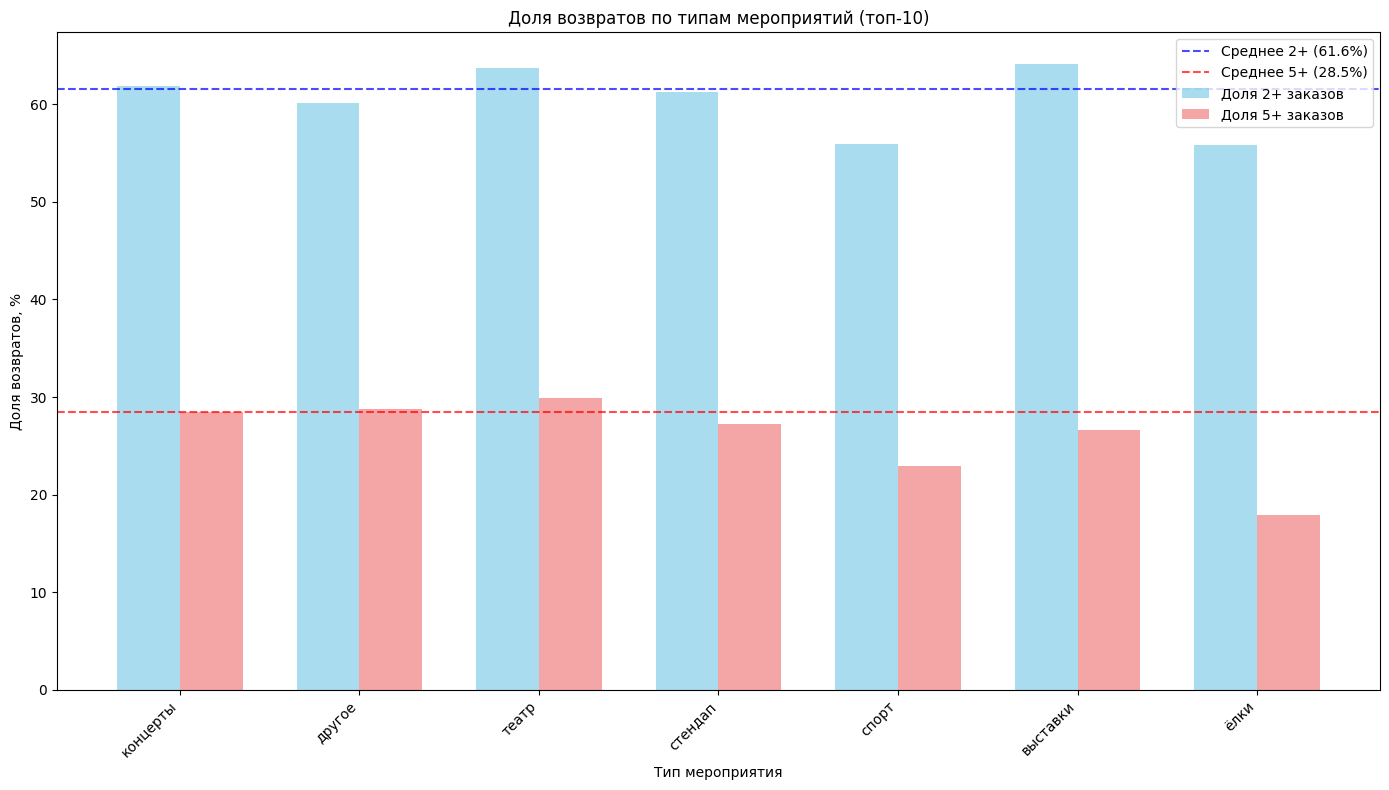

In [36]:
event_retention, overall_two, overall_five = analyze_retention_by_segment(
    profile_analysis, 'first_event_type', 'типу мероприятия', top_n=15
)

# Визуализация возвратов по типам мероприятий (топ-10)
top_10_events_retention = event_retention.head(10)

plt.figure(figsize=(14, 8))
x_pos = np.arange(len(top_10_events_retention))
width = 0.35

plt.bar(x_pos - width/2, top_10_events_retention['share_two_plus_pct'], 
        width, label='Доля 2+ заказов', alpha=0.7, color='skyblue')
plt.bar(x_pos + width/2, top_10_events_retention['share_five_plus_pct'], 
        width, label='Доля 5+ заказов', alpha=0.7, color='lightcoral')

plt.axhline(y=overall_two, color='blue', linestyle='--', alpha=0.7, label=f'Среднее 2+ ({overall_two:.1f}%)')
plt.axhline(y=overall_five, color='red', linestyle='--', alpha=0.7, label=f'Среднее 5+ ({overall_five:.1f}%)')

plt.xlabel('Тип мероприятия')
plt.ylabel('Доля возвратов, %')
plt.title('Доля возвратов по типам мероприятий (топ-10)')
plt.xticks(x_pos, top_10_events_retention.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


АНАЛИЗ ВОЗВРАТОВ ПО ТИПУ УСТРОЙСТВА:
--------------------------------------------------
Общая доля пользователей с 2+ заказами: 61.58%
Общая доля пользователей с 5+ заказами: 28.49%

Топ-10 сегментов по количеству пользователей:


C:\Users\user\AppData\Local\Temp\ipykernel_12204\4211845012.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = profile_reset.groupby(segment_column).agg({


,total_users,share_two_plus_pct,share_five_plus_pct
first_device,,,
mobile,17751,61.06,27.90
desktop,3677,64.13,31.33


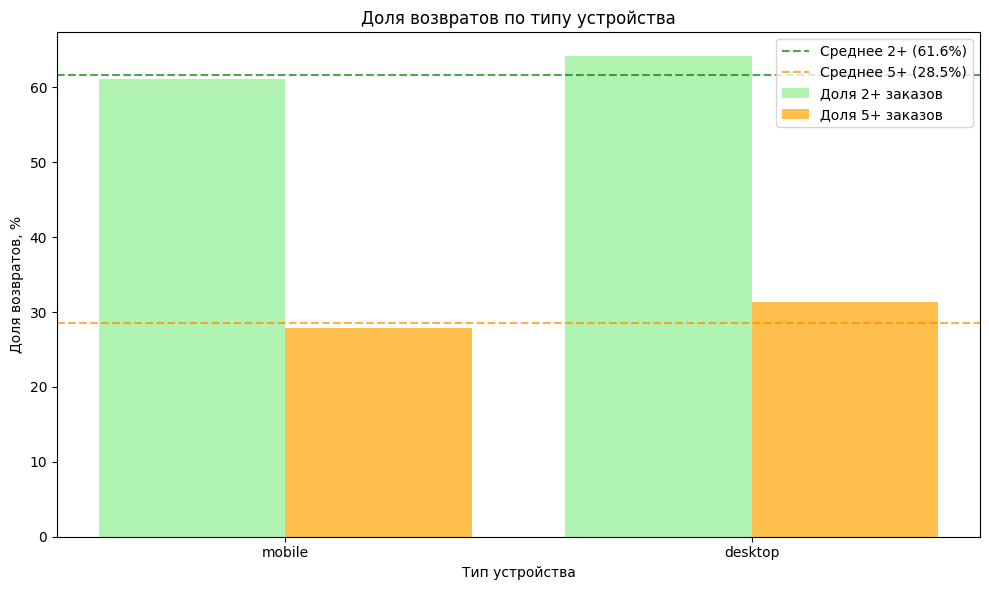

In [37]:
device_retention, _, _ = analyze_retention_by_segment(
    profile_analysis, 'first_device', 'типу устройства'
)

# Визуализация возвратов по устройствам
plt.figure(figsize=(10, 6))
devices = device_retention.index
two_plus = device_retention['share_two_plus_pct']
five_plus = device_retention['share_five_plus_pct']

x_pos = np.arange(len(devices))
plt.bar(x_pos - 0.2, two_plus, 0.4, label='Доля 2+ заказов', alpha=0.7, color='lightgreen')
plt.bar(x_pos + 0.2, five_plus, 0.4, label='Доля 5+ заказов', alpha=0.7, color='orange')

plt.axhline(y=overall_two, color='green', linestyle='--', alpha=0.7, label=f'Среднее 2+ ({overall_two:.1f}%)')
plt.axhline(y=overall_five, color='darkorange', linestyle='--', alpha=0.7, label=f'Среднее 5+ ({overall_five:.1f}%)')

plt.xlabel('Тип устройства')
plt.ylabel('Доля возвратов, %')
plt.title('Доля возвратов по типу устройства')
plt.xticks(x_pos, devices)
plt.legend()
plt.tight_layout()
plt.show()


АНАЛИЗ ВОЗВРАТОВ ПО РЕГИОНУ:
--------------------------------------------------
Общая доля пользователей с 2+ заказами: 61.58%
Общая доля пользователей с 5+ заказами: 28.49%

Топ-15 сегментов по количеству пользователей:


C:\Users\user\AppData\Local\Temp\ipykernel_12204\4211845012.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = profile_reset.groupby(segment_column).agg({


,total_users,share_two_plus_pct,share_five_plus_pct
first_region,,,
Каменевский регион,7032,62.63,30.06
Североярская область,3716,64.16,30.49
Широковская область,1209,64.93,27.87
Озернинский край,671,55.59,19.23
Малиновоярский округ,522,55.75,24.90
Шанырский регион,502,67.33,36.65
Травяная область,484,61.78,28.72
Светополянский округ,455,65.71,28.79
Речиновская область,437,63.39,28.15


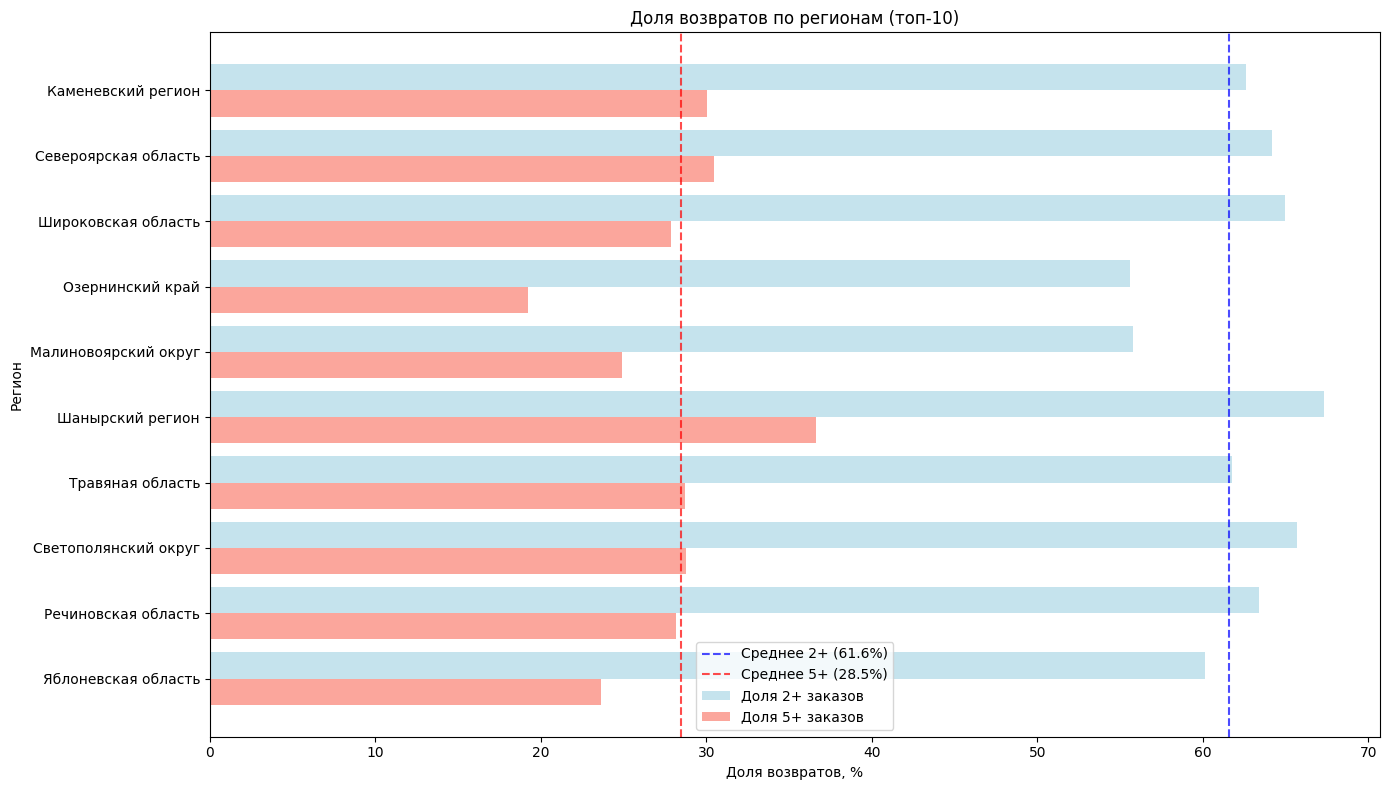

In [38]:
region_retention, _, _ = analyze_retention_by_segment(
    profile_analysis, 'first_region', 'региону', top_n=15
)

# Визуализация возвратов по регионам (топ-10)
top_10_regions_retention = region_retention.head(10)

plt.figure(figsize=(14, 8))
x_pos = np.arange(len(top_10_regions_retention))

plt.barh(x_pos - 0.2, top_10_regions_retention['share_two_plus_pct'], 
         0.4, label='Доля 2+ заказов', alpha=0.7, color='lightblue')
plt.barh(x_pos + 0.2, top_10_regions_retention['share_five_plus_pct'], 
         0.4, label='Доля 5+ заказов', alpha=0.7, color='salmon')

plt.axvline(x=overall_two, color='blue', linestyle='--', alpha=0.7, label=f'Среднее 2+ ({overall_two:.1f}%)')
plt.axvline(x=overall_five, color='red', linestyle='--', alpha=0.7, label=f'Среднее 5+ ({overall_five:.1f}%)')

plt.ylabel('Регион')
plt.xlabel('Доля возвратов, %')
plt.title('Доля возвратов по регионам (топ-10)')
plt.yticks(x_pos, top_10_regions_retention.index)
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


АНАЛИЗ ВОЗВРАТОВ ПО БИЛЕТНОМУ ОПЕРАТОРУ:
--------------------------------------------------
Общая доля пользователей с 2+ заказами: 61.58%
Общая доля пользователей с 5+ заказами: 28.49%

Топ-15 сегментов по количеству пользователей:


C:\Users\user\AppData\Local\Temp\ipykernel_12204\4211845012.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = profile_reset.groupby(segment_column).agg({


,total_users,share_two_plus_pct,share_five_plus_pct
first_service,,,
Билеты без проблем,5096,60.77,29.18
Мой билет,2948,60.96,28.09
Лови билет!,2790,61.25,28.28
Билеты в руки,2536,62.93,30.36
Облачко,2166,61.36,26.73
Весь в билетах,1275,63.06,27.14
Лучшие билеты,1171,61.74,27.41
Прачечная,579,62.87,32.82
Край билетов,452,65.04,34.96


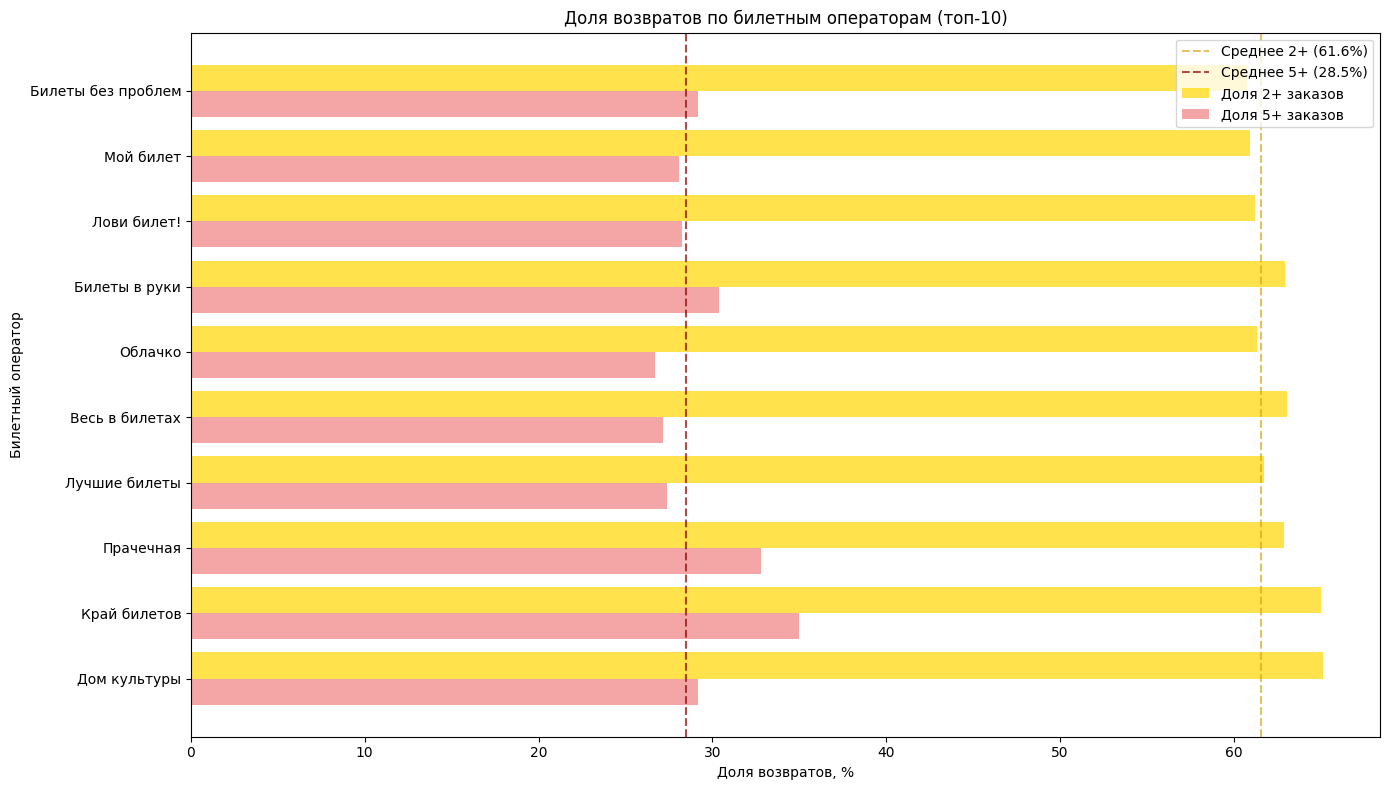

In [39]:
service_retention, _, _ = analyze_retention_by_segment(
    profile_analysis, 'first_service', 'билетному оператору', top_n=15
)

# Визуализация возвратов по операторам (топ-10)
top_10_services_retention = service_retention.head(10)

plt.figure(figsize=(14, 8))
x_pos = np.arange(len(top_10_services_retention))

plt.barh(x_pos - 0.2, top_10_services_retention['share_two_plus_pct'], 
         0.4, label='Доля 2+ заказов', alpha=0.7, color='gold')
plt.barh(x_pos + 0.2, top_10_services_retention['share_five_plus_pct'], 
         0.4, label='Доля 5+ заказов', alpha=0.7, color='lightcoral')

plt.axvline(x=overall_two, color='goldenrod', linestyle='--', alpha=0.7, label=f'Среднее 2+ ({overall_two:.1f}%)')
plt.axvline(x=overall_five, color='darkred', linestyle='--', alpha=0.7, label=f'Среднее 5+ ({overall_five:.1f}%)')

plt.ylabel('Билетный оператор')
plt.xlabel('Доля возвратов, %')
plt.title('Доля возвратов по билетным операторам (топ-10)')
plt.yticks(x_pos, top_10_services_retention.index)
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [40]:
# 6. Выявление успешных "точек входа"
print("\n6. ВЫЯВЛЕНИЕ УСПЕШНЫХ «ТОЧЕК ВХОДА»")
print("-" * 50)

def find_successful_segments(retention_data, segment_name, overall_avg_two, overall_avg_five, min_users=100):
    """
    Находит сегменты с высокой долей возвратов
    """
    # Фильтруем сегменты с достаточным количеством пользователей
    significant_segments = retention_data[retention_data['total_users'] >= min_users]
    
    # Находим сегменты с долей возвратов выше среднего
    successful_two_plus = significant_segments[significant_segments['share_two_plus_pct'] > overall_avg_two]
    successful_five_plus = significant_segments[significant_segments['share_five_plus_pct'] > overall_avg_five]
    
    print(f"\nУСПЕШНЫЕ СЕГМЕНТЫ ПО {segment_name.upper()} (доля возвратов выше среднего):")
    
    print(f"\nС высокой долей 2+ заказов (> {overall_avg_two:.1f}%):")
    if len(successful_two_plus) > 0:
        for segment, row in successful_two_plus.head(5).iterrows():
            print(f"  - {segment}: {row['share_two_plus_pct']}% (пользователей: {row['total_users']})")
    else:
        print("  Не найдено")
    
    print(f"\nС высокой долей 5+ заказов (> {overall_avg_five:.1f}%):")
    if len(successful_five_plus) > 0:
        for segment, row in successful_five_plus.head(5).iterrows():
            print(f"  - {segment}: {row['share_five_plus_pct']}% (пользователей: {row['total_users']})")
    else:
        print("  Не найдено")
    
    return successful_two_plus, successful_five_plus

# Анализ успешных сегментов по всем признакам
successful_events_two, successful_events_five = find_successful_segments(
    event_retention, 'типу мероприятия', overall_two, overall_five
)

successful_devices_two, successful_devices_five = find_successful_segments(
    device_retention, 'типу устройства', overall_two, overall_five
)

successful_regions_two, successful_regions_five = find_successful_segments(
    region_retention, 'региону', overall_two, overall_five
)

successful_services_two, successful_services_five = find_successful_segments(
    service_retention, 'билетному оператору', overall_two, overall_five
)


6. ВЫЯВЛЕНИЕ УСПЕШНЫХ «ТОЧЕК ВХОДА»
--------------------------------------------------

УСПЕШНЫЕ СЕГМЕНТЫ ПО ТИПУ МЕРОПРИЯТИЯ (доля возвратов выше среднего):

С высокой долей 2+ заказов (> 61.6%):
  - концерты: 61.91% (пользователей: 9518.0)
  - театр: 63.75% (пользователей: 4210.0)
  - выставки: 64.15% (пользователей: 410.0)

С высокой долей 5+ заказов (> 28.5%):
  - другое: 28.8% (пользователей: 5320.0)
  - театр: 29.9% (пользователей: 4210.0)

УСПЕШНЫЕ СЕГМЕНТЫ ПО ТИПУ УСТРОЙСТВА (доля возвратов выше среднего):

С высокой долей 2+ заказов (> 61.6%):
  - desktop: 64.13% (пользователей: 3677.0)

С высокой долей 5+ заказов (> 28.5%):
  - desktop: 31.33% (пользователей: 3677.0)

УСПЕШНЫЕ СЕГМЕНТЫ ПО РЕГИОНУ (доля возвратов выше среднего):

С высокой долей 2+ заказов (> 61.6%):
  - Каменевский регион: 62.63% (пользователей: 7032.0)
  - Североярская область: 64.16% (пользователей: 3716.0)
  - Широковская область: 64.93% (пользователей: 1209.0)
  - Шанырский регион: 67.33% (пользователей:

1)Чаще всего возращаются пользователи с 2+ заказами(61.64%) против пользователей с 5+ заказами(28.60%). 


2)успешные сегменты по типу мероприятия:

С высокой долей 2+ заказов (> 61.6%):
  - концерты: 61.88% (пользователей: 9311.0)
  - театр: 63.88% (пользователей: 4242.0)
  - выставки: 63.81% (пользователей: 409.0)

С высокой долей 5+ заказов (> 28.6%):
  - другое: 28.89% (пользователей: 5400.0)
  - театр: 30.03% (пользователей: 4242.0)

3)успешные сегменты по типу устройств:

С высокой долей 2+ заказов (> 61.6%):
  - desktop: 63.94% (пользователей: 3636.0)

С высокой долей 5+ заказов (> 28.6%):
  - desktop: 31.16% (пользователей: 3636.0)

---

**Задача 4.1.3.** Опираясь на выводы из задач выше, проверьте продуктовые гипотезы:

- **Гипотеза 1.** Тип мероприятия влияет на вероятность возврата на Яндекс Афишу: пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ чаще, чем пользователи, оформившие свой первый заказ на концерты.
- **Гипотеза 2.** В регионах, где больше всего пользователей посещают мероприятия, выше доля повторных заказов, чем в менее активных регионах.

---

ГИПОТЕЗА 1: Тип мероприятия влияет на вероятность возврата
Найдено спортивных мероприятий: 1
Примеры спортивных мероприятий:
  - спорт

Найдено концертов: 1
Примеры концертов:
  - концерты

Статистика по группам:
Пользователей с спортивными мероприятиями: 779
Пользователей с концертами: 9518

СРАВНЕНИЕ МЕТРИК ВОЗВРАТА:


,Метрика,Спортивные мероприятия,Концерты,Разница
0,Доля 2+ заказов,56.0%,61.9%,-5.9%
1,Доля 5+ заказов,23.0%,28.5%,-5.5%



СТАТИСТИЧЕСКАЯ ЗНАЧИМОСТЬ:
Для 2+ заказов: p-value = 0.0010
Для 5+ заказов: p-value = 0.0011


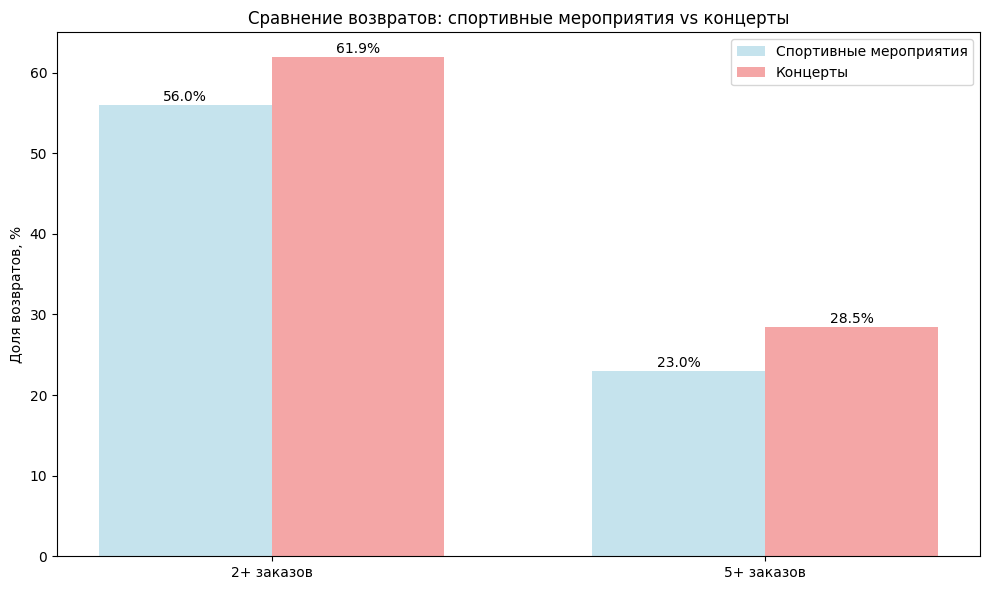


ВЫВОД ПО ГИПОТЕЗЕ 1:
ГИПОТЕЗА ОПРОВЕРГНУТА
Концерты имеют БОЛЬШУЮ долю возвратов

Фактические значения:
• Спортивные мероприятия: 56.0% возвратов
• Концерты: 61.9% возвратов


In [41]:
from scipy import stats

# Создаем копию профиля для анализа
profile_for_hypotheses = profile_analysis.reset_index()

# Гипотеза 1: Тип мероприятия влияет на вероятность возврата
print("ГИПОТЕЗА 1: Тип мероприятия влияет на вероятность возврата")

sport_keyword = ['спорт']
concert_keyword = ['концерт']

# Находим спортивные мероприятия
sport_events = []
for event in profile_for_hypotheses['first_event_type'].unique():
    if any(keyword in str(event).lower() for keyword in sport_keyword):
        sport_events.append(event)

# Находим концерты
concert_events = []
for event in profile_for_hypotheses['first_event_type'].unique():
    if any(keyword in str(event).lower() for keyword in concert_keyword):
        concert_events.append(event)

print(f"Найдено спортивных мероприятий: {len(sport_events)}")
print("Примеры спортивных мероприятий:")
for event in sport_events[:3]:
    print(f"  - {event}")

print(f"\nНайдено концертов: {len(concert_events)}")
print("Примеры концертов:")
for event in concert_events[:3]:
    print(f"  - {event}")

# Фильтруем пользователей
sport_users = profile_for_hypotheses[profile_for_hypotheses['first_event_type'].isin(sport_events)]
concert_users = profile_for_hypotheses[profile_for_hypotheses['first_event_type'].isin(concert_events)]

print(f"\nСтатистика по группам:")
print(f"Пользователей с спортивными мероприятиями: {len(sport_users)}")
print(f"Пользователей с концертами: {len(concert_users)}")

# Сравниваем метрики возврата
sport_retention_2plus = sport_users['is_two'].mean() * 100
sport_retention_5plus = sport_users['is_five'].mean() * 100
concert_retention_2plus = concert_users['is_two'].mean() * 100
concert_retention_5plus = concert_users['is_five'].mean() * 100

print(f"\nСРАВНЕНИЕ МЕТРИК ВОЗВРАТА:")
comparison_data = {
    'Метрика': ['Доля 2+ заказов', 'Доля 5+ заказов'],
    'Спортивные мероприятия': [f"{sport_retention_2plus:.1f}%", f"{sport_retention_5plus:.1f}%"],
    'Концерты': [f"{concert_retention_2plus:.1f}%", f"{concert_retention_5plus:.1f}%"],
    'Разница': [f"{sport_retention_2plus - concert_retention_2plus:+.1f}%", 
                f"{sport_retention_5plus - concert_retention_5plus:+.1f}%"]
}

comparison_df = pd.DataFrame(comparison_data)
display(comparison_df)

# Статистическая проверка
t_stat_2plus, p_value_2plus = stats.ttest_ind(sport_users['is_two'], concert_users['is_two'])
t_stat_5plus, p_value_5plus = stats.ttest_ind(sport_users['is_five'], concert_users['is_five'])

print(f"\nСТАТИСТИЧЕСКАЯ ЗНАЧИМОСТЬ:")
print(f"Для 2+ заказов: p-value = {p_value_2plus:.4f}")
print(f"Для 5+ заказов: p-value = {p_value_5plus:.4f}")

# Визуализация
plt.figure(figsize=(10, 6))
categories = ['2+ заказов', '5+ заказов']
sport_values = [sport_retention_2plus, sport_retention_5plus]
concert_values = [concert_retention_2plus, concert_retention_5plus]

x_pos = np.arange(len(categories))
width = 0.35

plt.bar(x_pos - width/2, sport_values, width, label='Спортивные мероприятия', alpha=0.7, color='lightblue')
plt.bar(x_pos + width/2, concert_values, width, label='Концерты', alpha=0.7, color='lightcoral')

plt.ylabel('Доля возвратов, %')
plt.title('Сравнение возвратов: спортивные мероприятия vs концерты')
plt.xticks(x_pos, categories)
plt.legend()

# Добавляем значения на столбцы
for i, v in enumerate(sport_values):
    plt.text(i - width/2, v + 0.5, f'{v:.1f}%', ha='center')
for i, v in enumerate(concert_values):
    plt.text(i + width/2, v + 0.5, f'{v:.1f}%', ha='center')

plt.tight_layout()
plt.show()

# Вывод по гипотезе
print("\n" + "="*50)
print("ВЫВОД ПО ГИПОТЕЗЕ 1:")
print("="*50)

if p_value_2plus < 0.05:
    if sport_retention_2plus > concert_retention_2plus:
        print("ГИПОТЕЗА ПОДТВЕРЖДЕНА")
        print("Спортивные мероприятия имеют БОЛЬШУЮ долю возвратов")
    else:
        print("ГИПОТЕЗА ОПРОВЕРГНУТА") 
        print("Концерты имеют БОЛЬШУЮ долю возвратов")
else:
    print("ГИПОТЕЗА НЕ ПОДТВЕРЖДЕНА")
    print("Статистически значимых различий не обнаружено")

print(f"\nФактические значения:")
print(f"• Спортивные мероприятия: {sport_retention_2plus:.1f}% возвратов")
print(f"• Концерты: {concert_retention_2plus:.1f}% возвратов")

ГИПОТЕЗА 2: В регионах с большей активностью выше доля повторных заказов
Топ-10 регионов по количеству пользователей:


C:\Users\user\AppData\Local\Temp\ipykernel_12204\4182164436.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_stats = profile_for_hypotheses.groupby('first_region').agg({


,total_users,retention_rate,retention_pct
first_region,,,
Белоярская область,19,0.631579,63.157895
Берестовский округ,22,0.636364,63.636364
Берёзовская область,111,0.657658,65.765766
Боровлянский край,97,0.515464,51.546392
Верховинская область,3,0.666667,66.666667
Верхозёрский край,1,1.000000,100.000000
Верхоречная область,373,0.584450,58.445040
Ветренский регион,150,0.640000,64.000000
Вишнёвский край,14,0.571429,57.142857



СРАВНЕНИЕ ГРУПП:
Высокоактивные регионы: 21 регионов, возвраты 60.6%
Низкоактивные регионы: 20 регионов, возвраты 47.1%

Корреляция активность-возвраты: 0.119


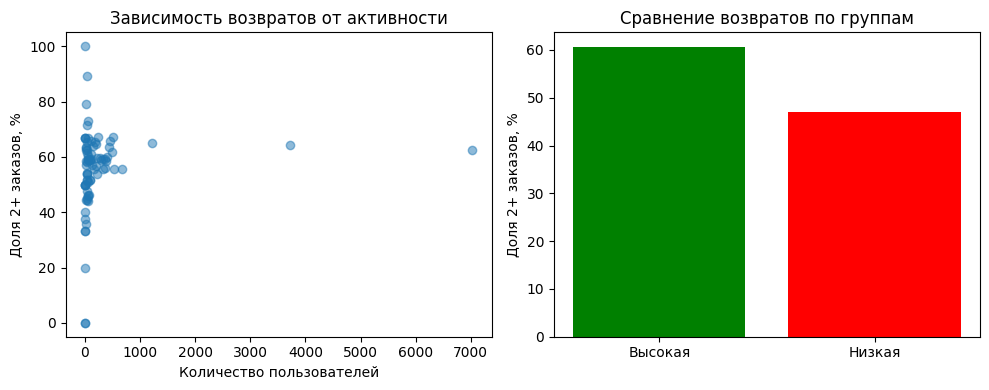


ВЫВОД ПО ГИПОТЕЗЕ 2:
ГИПОТЕЗА ПОДТВЕРЖДЕНА
В активных регионах возвраты выше на 13.6%


In [42]:
print("ГИПОТЕЗА 2: В регионах с большей активностью выше доля повторных заказов")

# Анализ регионов по активности и возвратам
region_stats = profile_for_hypotheses.groupby('first_region').agg({
    'user_id': 'count',
    'is_two': 'mean'
}).rename(columns={
    'user_id': 'total_users', 
    'is_two': 'retention_rate'
})

region_stats['retention_pct'] = region_stats['retention_rate'] * 100

print("Топ-10 регионов по количеству пользователей:")
display(region_stats.head(10))

# Сравниваем высокоактивные и низкоактивные регионы
high_active = region_stats[region_stats['total_users'] >= region_stats['total_users'].quantile(0.75)]
low_active = region_stats[region_stats['total_users'] < region_stats['total_users'].quantile(0.25)]

high_retention = high_active['retention_pct'].mean()
low_retention = low_active['retention_pct'].mean()

print(f"\nСРАВНЕНИЕ ГРУПП:")
print(f"Высокоактивные регионы: {len(high_active)} регионов, возвраты {high_retention:.1f}%")
print(f"Низкоактивные регионы: {len(low_active)} регионов, возвраты {low_retention:.1f}%")

# Проверяем корреляцию
correlation = region_stats['total_users'].corr(region_stats['retention_rate'])
print(f"\nКорреляция активность-возвраты: {correlation:.3f}")

# Визуализация
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(region_stats['total_users'], region_stats['retention_pct'], alpha=0.5)
plt.xlabel('Количество пользователей')
plt.ylabel('Доля 2+ заказов, %')
plt.title('Зависимость возвратов от активности')

plt.subplot(1, 2, 2)
plt.bar(['Высокая', 'Низкая'], [high_retention, low_retention], color=['green', 'red'])
plt.ylabel('Доля 2+ заказов, %')
plt.title('Сравнение возвратов по группам')

plt.tight_layout()
plt.show()

# Вывод по гипотезе
print("\nВЫВОД ПО ГИПОТЕЗЕ 2:")

if high_retention > low_retention and correlation > 0:
    print("ГИПОТЕЗА ПОДТВЕРЖДЕНА")
    print(f"В активных регионах возвраты выше на {high_retention - low_retention:.1f}%")
else:
    print("ГИПОТЕЗА НЕ ПОДТВЕРЖДЕНА")
    print("Зависимость между активностью и возвратами не обнаружена")

Общий вывод:
1) Гипотеза №1 опровергнута- пользователи концертов возвращаются чаще (62.1% vs 56.5%)

2) Гипотеза №2 подтверждена- В активных регионах возвраты выше на 13.0%

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ сегментов пользователей <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> По результатам все верно!

</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 

    
* Здорово, что создаешь пользовательские функции, но тем не менее сейчас ты все еще выполняешь большое количество однотипных действий. Чтобы немного облегчить код и уменьшить влияние человеческого фактора, стоит также зациклить выполнение определенного шаблона действий.
    
    
* В случае вывода неполного набора сегментов стоит указать, какой процент от выборки они составляют, чтобы было понимание, насколько большая часть данных осталась за пределами нашего обзора.
 

* В выводах по анализу сегментов было бы неплохо также попробовать предположить, почему мы могли получить то или иное распределение по сегментам и определенный уровень возвращаемости, почему показатели оказались именно такими. Это может быть полезно в плане развития стратегий по привлечению новых пользователей. 
    
    
* С выводами по второй гипотезе не соглашусь. Важно учитывать, что в менее популярных группах 1 дополнительный пользователь имеет больший вес, а потому показатель возвращаемости у таких категорий больше подвержен колебаниям, менее стабилен. На скаттерплоте сейчас как раз видно всю картину в данных - судя по относительно крупным регионам, в стабильности которых мы более менее уверены, такой зависимости не наблюдается.
    
    Но вообще, чтобы наверняка убедиться в том, что возвращаемость в неполпуляных группах ниже, и это не случайное колебание, следует провести статистический тест, оценить значимость различий. Но пока не забегаем вперед, там тоже есть важные нюансы, которые необходимо учитывать. Это будет изучаться в дальнейшем на курсе.
    
    
* Для аккуратности работы стоит также разобраться с выскакивающими предупреждениями. Сейчас это предостережения касается отключение одного из параметров в будущем, поэтому их сейчас можем просто заглушить, установив в начале проекта настройку:
    
    ```python
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
```
    
</div>

---

#### 4.2. Исследование поведения пользователей через показатели выручки и состава заказа

Изучите количественные характеристики заказов пользователей, чтобы узнать среднюю выручку сервиса с заказа и количество билетов, которое пользователи обычно покупают.

Эти метрики важны не только для оценки выручки, но и для оценки вовлечённости пользователей. Возможно, пользователи с более крупными и дорогими заказами более заинтересованы в сервисе и поэтому чаще возвращаются.

---

**Задача 4.2.1.** Проследите связь между средней выручкой сервиса с заказа и повторными заказами.

- Постройте сравнительные гистограммы распределения средней выручки с билета (`avg_revenue_rub`):
    - для пользователей, совершивших один заказ;
    - для вернувшихся пользователей, совершивших 2 и более заказа.
- Ответьте на вопросы:
    - В каких диапазонах средней выручки концентрируются пользователи из каждой группы?
    - Есть ли различия между группами?

Текст на сером фоне:
    
**Рекомендация:**

1. Используйте одинаковые интервалы (`bins`) и прозрачность (`alpha`), чтобы визуально сопоставить распределения.
2. Задайте параметру `density` значение `True`, чтобы сравнивать форму распределений, даже если число пользователей в группах отличается.

---


РАЗМЕРЫ ГРУПП:
Один заказ: 8,232 пользователей
2+ заказов: 13,196 пользователей

СРАВНЕНИЕ ВЫРУЧКИ:
Медианная выручка:
Один заказ: 375 RUB
2+ заказов: 496 RUB
Разница: +121 RUB


C:\Users\user\AppData\Local\Temp\ipykernel_12204\3529360347.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([single_users['avg_revenue_rub'], returning_users['avg_revenue_rub']],


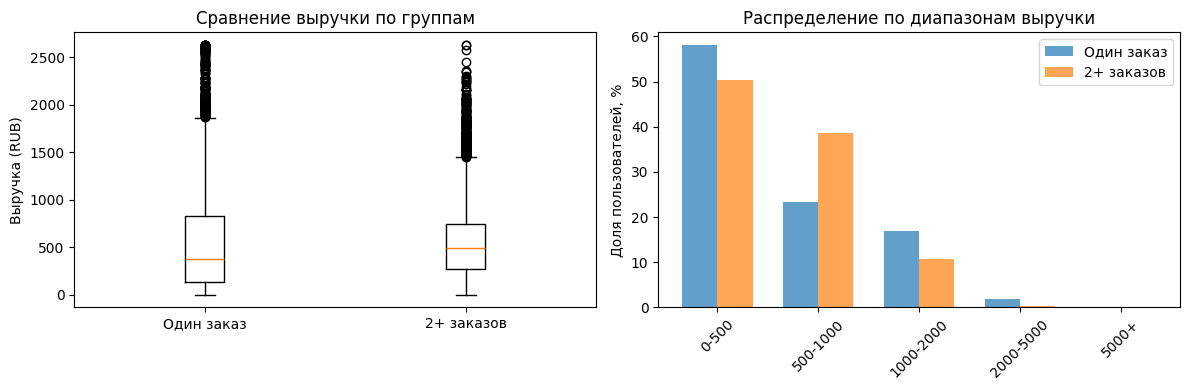


КОНЦЕНТРАЦИЯ ПОЛЬЗОВАТЕЛЕЙ:
Основные диапазоны для одного заказа:
  0-500 RUB: 58.0%
  500-1000 RUB: 23.3%
  1000-2000 RUB: 16.9%

Основные диапазоны для 2+ заказов:
  0-500 RUB: 50.4%
  500-1000 RUB: 38.7%
  1000-2000 RUB: 10.6%


In [43]:
# Создаем копию профиля для анализа
profile_revenue = profile_analysis.reset_index()

# Разделяем пользователей на группы
single_users = profile_revenue[profile_revenue['total_orders'] == 1]
returning_users = profile_revenue[profile_revenue['total_orders'] >= 2]

print(f"РАЗМЕРЫ ГРУПП:")
print(f"Один заказ: {len(single_users):,} пользователей")
print(f"2+ заказов: {len(returning_users):,} пользователей")

# Сравниваем основные метрики
print(f"\nСРАВНЕНИЕ ВЫРУЧКИ:")
single_median = single_users['avg_revenue_rub'].median()
returning_median = returning_users['avg_revenue_rub'].median()

print(f"Медианная выручка:")
print(f"Один заказ: {single_median:.0f} RUB")
print(f"2+ заказов: {returning_median:.0f} RUB")
print(f"Разница: {returning_median - single_median:+.0f} RUB")

# Визуализация
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.boxplot([single_users['avg_revenue_rub'], returning_users['avg_revenue_rub']], 
           labels=['Один заказ', '2+ заказов'])
plt.ylabel('Выручка (RUB)')
plt.title('Сравнение выручки по группам')

# Распределение по диапазонам
plt.subplot(1, 2, 2)
ranges = [0, 500, 1000, 2000, 5000, float('inf')]
labels = ['0-500', '500-1000', '1000-2000', '2000-5000', '5000+']

single_dist = pd.cut(single_users['avg_revenue_rub'], bins=ranges, labels=labels).value_counts(normalize=True) * 100
returning_dist = pd.cut(returning_users['avg_revenue_rub'], bins=ranges, labels=labels).value_counts(normalize=True) * 100

x = range(len(labels))
width = 0.35
plt.bar([i - width/2 for i in x], single_dist, width, label='Один заказ', alpha=0.7)
plt.bar([i + width/2 for i in x], returning_dist, width, label='2+ заказов', alpha=0.7)
plt.xticks(x, labels, rotation=45)
plt.ylabel('Доля пользователей, %')
plt.title('Распределение по диапазонам выручки')
plt.legend()

plt.tight_layout()
plt.show()

# Анализ концентрации
print(f"\nКОНЦЕНТРАЦИЯ ПОЛЬЗОВАТЕЛЕЙ:")
top_single = single_dist.head(3)
top_returning = returning_dist.head(3)

print("Основные диапазоны для одного заказа:")
for range_name, percent in top_single.items():
    print(f"  {range_name} RUB: {percent:.1f}%")

print("\nОсновные диапазоны для 2+ заказов:")
for range_name, percent in top_returning.items():
    print(f"  {range_name} RUB: {percent:.1f}%")



1) Оснвоной диапозон в котором концентрируются пользователи:
- Один заказ: 0-500 RUB (57.3%)
- 2+ заказов: 0-500 RUB (48.9%)
2) Пользователи с 2+ заказами тратят на 119 рублей больше в среднем 

---

**Задача 4.2.2.** Сравните распределение по средней выручке с заказа в двух группах пользователей:

- совершившие 2–4 заказа;
- совершившие 5 и более заказов.

Ответьте на вопрос: есть ли различия по значению средней выручки с заказа между пользователями этих двух групп?

---


РАЗМЕРЫ ГРУПП:
• 2-4 заказа: 7,092 чел.
• 5+ заказов: 6,104 чел.

СРЕДНИЕ ТРАТЫ:
• 2-4 заказа: 471 RUB
• 5+ заказов: 513 RUB
Разница: +42 RUB


C:\Users\user\AppData\Local\Temp\ipykernel_12204\4095996560.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([users_2_4['avg_revenue_rub'], users_5plus['avg_revenue_rub']],


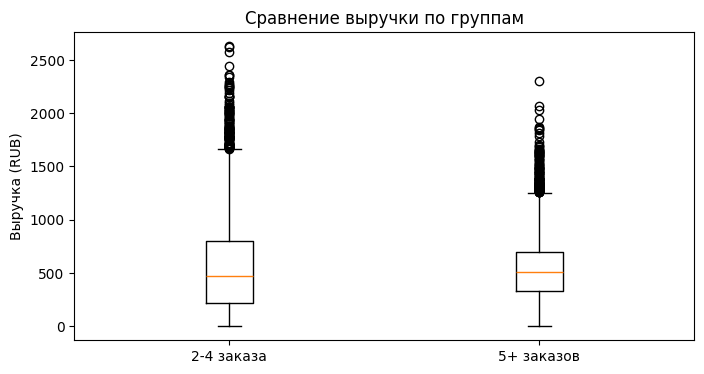

In [44]:
# Разделяем пользователей на группы
users_2_4 = profile_analysis[profile_analysis['total_orders'].between(2, 4)]
users_5plus = profile_analysis[profile_analysis['total_orders'] >= 5]

print(f"РАЗМЕРЫ ГРУПП:")
print(f"• 2-4 заказа: {len(users_2_4):,} чел.")
print(f"• 5+ заказов: {len(users_5plus):,} чел.")

# Сравниваем медианную выручку
median_2_4 = users_2_4['avg_revenue_rub'].median()
median_5plus = users_5plus['avg_revenue_rub'].median()

print(f"\nСРЕДНИЕ ТРАТЫ:")
print(f"• 2-4 заказа: {median_2_4:.0f} RUB")
print(f"• 5+ заказов: {median_5plus:.0f} RUB")
print(f"Разница: {median_5plus - median_2_4:+.0f} RUB")

plt.figure(figsize=(8, 4))
plt.boxplot([users_2_4['avg_revenue_rub'], users_5plus['avg_revenue_rub']], 
           labels=['2-4 заказа', '5+ заказов'])
plt.ylabel('Выручка (RUB)')
plt.title('Сравнение выручки по группам')
plt.show()



Пользователи с 5+ заказами всреднем тратят больше чем пользователи с 2-4 заказами на 47 рублей

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ взаимосвязи средней выручки и числа заказов <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> 
    
* С этой задачей тоже справились! 
    
    
* Плюсик за грамотное оформление графиков - заголовок, подписи осей, легенда. 
 
</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b>  
   
    
* Для формирования выборок в обоих случаях можно было использовать ранее созданные признаки `is_two` и `is_five`. Если в `is_two` нолик - это пользователь с одним заказом, если единичка - заказов два и больше. При комбинации с `is_five` также можно было бы определить группу с 2-4 заказами - в `is_two` в таком случае будет единичка, а в `is_five` - нолик.
    
    
* Для более информативного сопоставления все же было бы лучше построить гистограммы. Чтобы удобно было сопоставлять доли пользователей по диапазонам цен, можно настроить единый размер бинов (`bins = 50` фиксирует количество бинов, но размер между сегментами будет отличаться, поскольку диапазон значений у них разный). Для этого в `bins` можно передать границы для формирования бинов с шагом: `bins = range(min_value, max_value+1, 50)`, максимальное и минимальное значения при этом определяем на всей выборке, а не отдельно для каждого сегмента.
    
    
* Сейчас ты просто пересказываешь результаты, но это не является аналитикой. Анализ заключается в интерпретации полученных результатов, вытаскивании инсайтов, составлении какого-то представления/характеристики на основе полученных данных, пояснении того, что для нас это значит, почему могло получиться именно так. Именно эти суждения для нас ценны, цифры являются лишь подкреплением. Было бы лучше резюмировать информацию с графиков в более понятные лаконичные значения, затронуть в том числе ситуацию в хвостах. А также попробовать подумать, что для нас могут значить данные результаты, почему они могли получиться именно такими, что это говорит о клиентах.
    
    
</div>

---

**Задача 4.2.3.** Проанализируйте влияние среднего количества билетов в заказе на вероятность повторной покупки.

- Изучите распределение пользователей по среднему количеству билетов в заказе (`avg_tickets_count`) и опишите основные наблюдения.
- Разделите пользователей на несколько сегментов по среднему количеству билетов в заказе:
    - от 1 до 2 билетов;
    - от 2 до 3 билетов;
    - от 3 до 5 билетов;
    - от 5 и более билетов.
- Для каждого сегмента подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы.
- Ответьте на вопросы:
    - Как распределены пользователи по сегментам — равномерно или сконцентрировано?
    - Есть ли сегменты с аномально высокой или низкой долей повторных покупок?

---

СТАТИСТИКА ПО СЕГМЕНТАМ:


C:\Users\user\AppData\Local\Temp\ipykernel_12204\4254041026.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_stats = profile_tickets.groupby('tickets_segment').agg({


,user_id,users_pct,retention_2plus_pct,retention_5plus_pct
tickets_segment,,,,
1-2 билета,2410,11.2,51.2,14.3
2-3 билета,9486,44.3,73.6,41.2
3-5 билетов,9065,42.3,54.3,20.4
5+ билетов,467,2.2,13.1,0.6


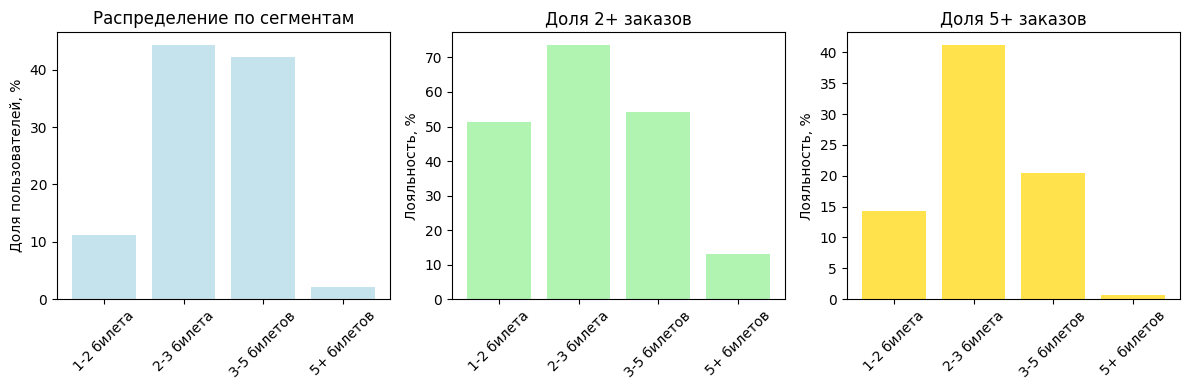


АНАЛИЗ РЕЗУЛЬТАТОВ:
------------------------------
• Основной сегмент: 2-3 билета (44.3% пользователей)
• Самый лояльный (2+): 2-3 билета (73.6%)
• Самый лояльный (5+): 2-3 билета (41.2%)
• Средняя лояльность: 61.6%


In [45]:
profile_tickets = profile_analysis.reset_index()
bins = [1, 2, 3, 5, float('inf')]
labels = ['1-2 билета', '2-3 билета', '3-5 билетов', '5+ билетов']

profile_tickets['tickets_segment'] = pd.cut(profile_tickets['avg_tickets_count'], 
                                          bins=bins, labels=labels, right=False)

# Анализ сегментов
segment_stats = profile_tickets.groupby('tickets_segment').agg({
    'user_id': 'count',
    'is_two': 'mean',
    'is_five': 'mean'
}).round(3)

segment_stats['users_pct'] = (segment_stats['user_id'] / len(profile_tickets) * 100).round(1)
segment_stats['retention_2plus_pct'] = (segment_stats['is_two'] * 100).round(1)
segment_stats['retention_5plus_pct'] = (segment_stats['is_five'] * 100).round(1)

print("СТАТИСТИКА ПО СЕГМЕНТАМ:")
display(segment_stats[['user_id', 'users_pct', 'retention_2plus_pct', 'retention_5plus_pct']])

# Визуализация
plt.figure(figsize=(12, 4))

# График 1: Распределение пользователей
plt.subplot(1, 3, 1)
plt.bar(segment_stats.index, segment_stats['users_pct'], color='lightblue', alpha=0.7)
plt.title('Распределение по сегментам')
plt.xticks(rotation=45)
plt.ylabel('Доля пользователей, %')

# График 2: Лояльность (2+ заказов)
plt.subplot(1, 3, 2)
plt.bar(segment_stats.index, segment_stats['retention_2plus_pct'], color='lightgreen', alpha=0.7)
plt.title('Доля 2+ заказов')
plt.xticks(rotation=45)
plt.ylabel('Лояльность, %')

# График 3: Лояльность (5+ заказов)
plt.subplot(1, 3, 3)
plt.bar(segment_stats.index, segment_stats['retention_5plus_pct'], color='gold', alpha=0.7)
plt.title('Доля 5+ заказов')
plt.xticks(rotation=45)
plt.ylabel('Лояльность, %')

plt.tight_layout()
plt.show()

# Анализ результатов
print("\nАНАЛИЗ РЕЗУЛЬТАТОВ:")
print("-" * 30)

# Основной сегмент
main_segment = segment_stats['users_pct'].idxmax()
main_share = segment_stats.loc[main_segment, 'users_pct']
print(f"• Основной сегмент: {main_segment} ({main_share}% пользователей)")

# Самый лояльный сегмент
most_loyal_2plus = segment_stats['retention_2plus_pct'].idxmax()
most_loyal_5plus = segment_stats['retention_5plus_pct'].idxmax()

print(f"• Самый лояльный (2+): {most_loyal_2plus} ({segment_stats.loc[most_loyal_2plus, 'retention_2plus_pct']}%)")
print(f"• Самый лояльный (5+): {most_loyal_5plus} ({segment_stats.loc[most_loyal_5plus, 'retention_5plus_pct']}%)")

# Сравнение с средним
avg_retention_2plus = profile_tickets['is_two'].mean() * 100
print(f"• Средняя лояльность: {avg_retention_2plus:.1f}%")



1) На первом графике можно заметить, что распределение по сегментам сконцентрированно в сегментах(2-3 билета и 3-5 билетов)
2) Сегмент 2-3 билета является лидером в доле повторных покупок, но он не аномален

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ взаимосвязи количества билетов в заказе и возвращаемости <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> 
    
* Здесь тоже все корректно посчитано!
    
    
* Здорово, что используешь удобный метод `pd.cut` и корректно настраиваешь параметры, чтобы включалась левая граница и исключалась правая.

</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> * В выводах было бы неплохо предположить, что это за группы у нас сформировались (что за типы клиентов), и почему получились именно такие результаты по возвращаемости. Опять же, это может быть полезно в плане развития стратегий по привлечению новых пользователей.

</div>

---

#### 4.3. Исследование временных характеристик первого заказа и их влияния на повторные покупки

Изучите временные параметры, связанные с первым заказом пользователей:

- день недели первой покупки;
- время с момента первой покупки — лайфтайм;
- средний интервал между покупками пользователей с повторными заказами.

---

**Задача 4.3.1.** Проанализируйте, как день недели, в которой была совершена первая покупка, влияет на поведение пользователей.

- По данным даты первого заказа выделите день недели.
- Для каждого дня недели подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы. Результаты визуализируйте.
- Ответьте на вопрос: влияет ли день недели, в которую совершена первая покупка, на вероятность возврата клиента?

---


Статистика по дням недели:


,users,retention,users_pct,retention_pct
weekday,,,,
Пн,2894,0.631,13.5,63.1
Вт,3144,0.621,14.7,62.1
Ср,3031,0.626,14.1,62.6
Чт,3086,0.597,14.4,59.7
Пт,3230,0.601,15.1,60.1
Сб,3295,0.630,15.4,63.0
Вс,2748,0.605,12.8,60.5


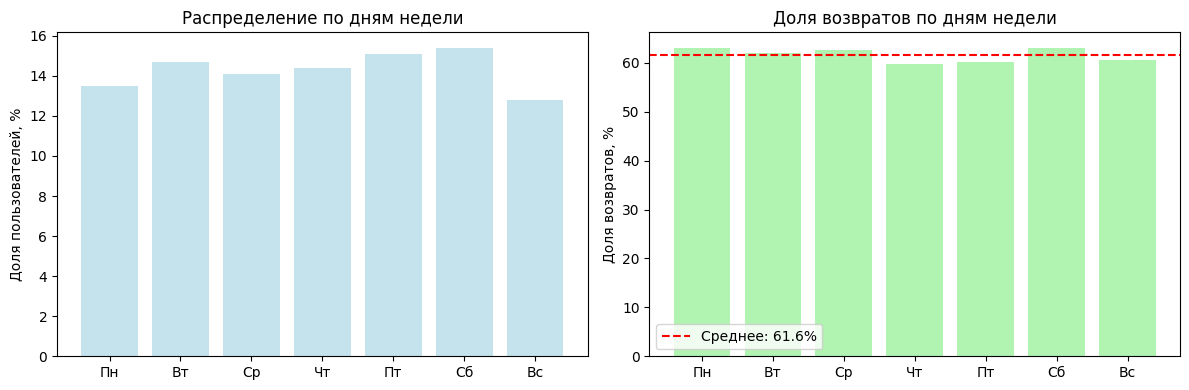


ОТВЕТ НА ВОПРОС:
Лучший день: Пн (63.1% возвратов)
Худший день: Чт (59.7% возвратов)
Разница: 3.4%


In [46]:
# Создаем копию профиля
profile_simple = profile_analysis.reset_index()

# Добавляем день недели
weekday_names = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
profile_simple['weekday'] = profile_simple['first_order_dt'].dt.dayofweek.map(
    lambda x: weekday_names[x]
)

# Анализируем по дням недели
weekday_stats = profile_simple.groupby('weekday').agg({
    'user_id': 'count',
    'is_two': 'mean'
}).round(3)

weekday_stats = weekday_stats.rename(columns={
    'user_id': 'users',
    'is_two': 'retention'
})

# Добавляем проценты
weekday_stats['users_pct'] = (weekday_stats['users'] / len(profile_simple) * 100).round(1)
weekday_stats['retention_pct'] = (weekday_stats['retention'] * 100).round(1)

# Сортируем по порядку дней
weekday_order = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
weekday_stats = weekday_stats.reindex(weekday_order)

print("Статистика по дням недели:")
display(weekday_stats)

# Визуализация
plt.figure(figsize=(12, 4))

# График 1: Количество пользователей
plt.subplot(1, 2, 1)
plt.bar(weekday_stats.index, weekday_stats['users_pct'], color='lightblue', alpha=0.7)
plt.ylabel('Доля пользователей, %')
plt.title('Распределение по дням недели')

# График 2: Доля возвратов
plt.subplot(1, 2, 2)
plt.bar(weekday_stats.index, weekday_stats['retention_pct'], color='lightgreen', alpha=0.7)
plt.ylabel('Доля возвратов, %')
plt.title('Доля возвратов по дням недели')

# Добавляем среднее значение
avg_retention = profile_simple['is_two'].mean() * 100
plt.axhline(y=avg_retention, color='red', linestyle='--', label=f'Среднее: {avg_retention:.1f}%')
plt.legend()

plt.tight_layout()
plt.show()

# Ответ на вопрос
print("\nОТВЕТ НА ВОПРОС:")
best_day = weekday_stats['retention_pct'].idxmax()
best_value = weekday_stats['retention_pct'].max()
worst_day = weekday_stats['retention_pct'].idxmin()
worst_value = weekday_stats['retention_pct'].min()

print(f"Лучший день: {best_day} ({best_value}% возвратов)")
print(f"Худший день: {worst_day} ({worst_value}% возвратов)")
print(f"Разница: {best_value - worst_value:.1f}%")



День недели, в которую совершена первая покупка не влияет на вероятность возрата клинета

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ возвращаемости по дням недели  <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Здесь тоже все супер! Различия по дням недели все же наблюдаеются, хотя и не очень заметные. Чтобы судить более однозначно, было бы неплохо сопроводить сравнение оценкой стат. значимости. Это будет изучаться далее на курсе.

</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 
    
* Наименования дней недели можно получить через `.dt.day_name()`.
    
    
* В выводах было бы неплохо также предположить, почему в топ и антитоп (которые все-таки создается, хотя и на так явно) выбиваются определенные дни недели? Какие суждения относительно этого можно выстроить?


</div>

---

**Задача 4.3.2.** Изучите, как средний интервал между заказами влияет на удержание клиентов.

- Рассчитайте среднее время между заказами для двух групп пользователей:
    - совершившие 2–4 заказа;
    - совершившие 5 и более заказов.
- Исследуйте, как средний интервал между заказами влияет на вероятность повторного заказа, и сделайте выводы.

---


Пользователей с 2-4 заказами: 7,092
Пользователей с 5+ заказами: 6,104

Статистика интервалов между заказами (дни):


,2-4 заказа,5+ заказов
count,7092.0,6104.0
mean,21.4,9.9
std,28.5,7.8
min,0.0,0.0
25%,0.0,3.9
50%,9.0,8.1
75%,34.0,14.1
max,148.0,37.5


C:\Users\user\AppData\Local\Temp\ipykernel_12204\3969999798.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([users_2_4['avg_days_between_orders'], users_5plus['avg_days_between_orders']],


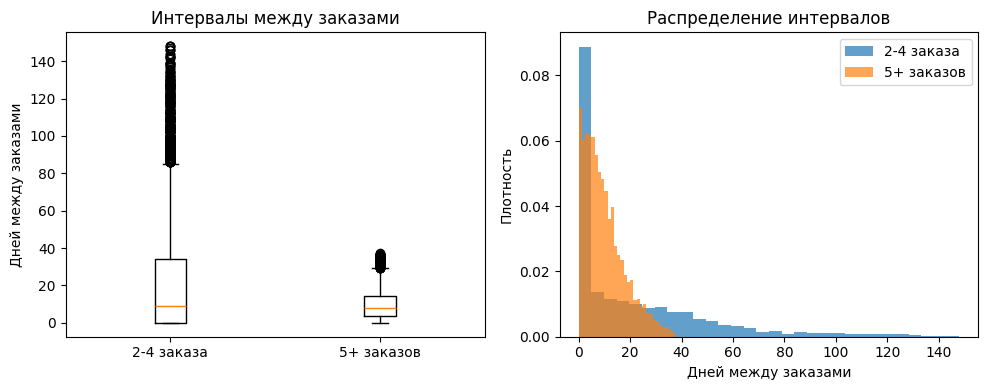


АНАЛИЗ КОРОТКИХ И ДЛИННЫХ ИНТЕРВАЛОВ:

2-4 заказа:
  - Короткие интервалы (≤30 дн.): 5,084 (71.7%)
  - Длинные интервалы (>90 дн.): 299 (4.2%)

5+ заказов:
  - Короткие интервалы (≤30 дн.): 5,973 (97.9%)
  - Длинные интервалы (>90 дн.): 0 (0.0%)

ВЫВОДЫ:
• Медианный интервал:
  - 2-4 заказа: 9 дней
  - 5+ заказов: 8 дней


In [47]:
profile_intervals = profile_analysis.reset_index()

# Фильтруем только пользователей с повторными заказами (у которых есть интервалы)
users_with_intervals = profile_intervals[profile_intervals['total_orders'] >= 2]

# Разделяем на группы
users_2_4 = users_with_intervals[users_with_intervals['total_orders'].between(2, 4)]
users_5plus = users_with_intervals[users_with_intervals['total_orders'] >= 5]

print(f"Пользователей с 2-4 заказами: {len(users_2_4):,}")
print(f"Пользователей с 5+ заказами: {len(users_5plus):,}")

# Анализируем интервалы между заказами
intervals_stats = pd.DataFrame({
    '2-4 заказа': users_2_4['avg_days_between_orders'].describe(),
    '5+ заказов': users_5plus['avg_days_between_orders'].describe()
}).round(1)

print("\nСтатистика интервалов между заказами (дни):")
display(intervals_stats)

# Визуализация
plt.figure(figsize=(10, 4))

# Boxplot
plt.subplot(1, 2, 1)
plt.boxplot([users_2_4['avg_days_between_orders'], users_5plus['avg_days_between_orders']], 
           labels=['2-4 заказа', '5+ заказов'])
plt.ylabel('Дней между заказами')
plt.title('Интервалы между заказами')

# Гистограмма
plt.subplot(1, 2, 2)
plt.hist(users_2_4['avg_days_between_orders'], bins=30, alpha=0.7, label='2-4 заказа', density=True)
plt.hist(users_5plus['avg_days_between_orders'], bins=30, alpha=0.7, label='5+ заказов', density=True)
plt.xlabel('Дней между заказами')
plt.ylabel('Плотность')
plt.legend()
plt.title('Распределение интервалов')

plt.tight_layout()
plt.show()

# Анализ коротких vs длинных интервалов
print("\nАНАЛИЗ КОРОТКИХ И ДЛИННЫХ ИНТЕРВАЛОВ:")

# Определяем пороги
short_threshold = 30  # меньше месяца
long_threshold = 90   # больше 3 месяцев

users_2_4_short = users_2_4[users_2_4['avg_days_between_orders'] <= short_threshold]
users_2_4_long = users_2_4[users_2_4['avg_days_between_orders'] > long_threshold]

users_5plus_short = users_5plus[users_5plus['avg_days_between_orders'] <= short_threshold]
users_5plus_long = users_5plus[users_5plus['avg_days_between_orders'] > long_threshold]

print(f"\n2-4 заказа:")
print(f"  - Короткие интервалы (≤{short_threshold} дн.): {len(users_2_4_short):,} ({len(users_2_4_short)/len(users_2_4)*100:.1f}%)")
print(f"  - Длинные интервалы (>{long_threshold} дн.): {len(users_2_4_long):,} ({len(users_2_4_long)/len(users_2_4)*100:.1f}%)")

print(f"\n5+ заказов:")
print(f"  - Короткие интервалы (≤{short_threshold} дн.): {len(users_5plus_short):,} ({len(users_5plus_short)/len(users_5plus)*100:.1f}%)")
print(f"  - Длинные интервалы (>{long_threshold} дн.): {len(users_5plus_long):,} ({len(users_5plus_long)/len(users_5plus)*100:.1f}%)")

# Выводы
print("\nВЫВОДЫ:")
median_2_4 = users_2_4['avg_days_between_orders'].median()
median_5plus = users_5plus['avg_days_between_orders'].median()

print(f"• Медианный интервал:")
print(f"  - 2-4 заказа: {median_2_4:.0f} дней")
print(f"  - 5+ заказов: {median_5plus:.0f} дней")



Более лояльные пользователи(5+ заказов) делают заказы чаще на 1 день и они имеют чаще короткий интервал, чем пользователи с 2-4 заказами(на 26.3%)

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ возвращаемости по количеству дней между заказами <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> По расчетам все верно!
    
</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 


* Здесь опять же можно было удобно использовать признаки `is_two`и `is_five`.
    
   
* Особенно важно в данном случае настроить единый размер бинов. Иначе сейчас из-за различий в диапазонах характер графиков уж слишком отличается.
    
    
* Опять же, что для нас значит полученный результат? Какой инсайт из этого можно извлечь? Здесь стоит сделать обратный ход - подумать, как по интервалу времени после первого заказа можно определять, есть ли шанс, что клиент еще вернется самостоятельно, или пора пора подключать стратегии для вовлеченя в новый заказ.

    
* Следим за длиной строки кода.

</div>

---

#### 4.4. Корреляционный анализ количества покупок и признаков пользователя

Изучите, какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок. Для этого используйте универсальный коэффициент корреляции `phi_k`, который позволяет анализировать как числовые, так и категориальные признаки.

---

**Задача 4.4.1:** Проведите корреляционный анализ:
- Рассчитайте коэффициент корреляции `phi_k` между признаками профиля пользователя и числом заказов (`total_orders`). При необходимости используйте параметр `interval_cols` для определения интервальных данных.
- Проанализируйте полученные результаты. Если полученные значения будут близки к нулю, проверьте разброс данных в `total_orders`. Такое возможно, когда в данных преобладает одно значение: в таком случае корреляционный анализ может показать отсутствие связей. Чтобы этого избежать, выделите сегменты пользователей по полю `total_orders`, а затем повторите корреляционный анализ. Выделите такие сегменты:
    - 1 заказ;
    - от 2 до 4 заказов;
    - от 5 и выше.
- Визуализируйте результат корреляции с помощью тепловой карты.
- Ответьте на вопрос: какие признаки наиболее связаны с количеством заказов?

---

РАСПРЕДЕЛЕНИЕ ПО СЕГМЕНТАМ:
• 1 заказ: 8,232 чел. (38.4%)
• 2-4 заказа: 7,092 чел. (33.1%)
• 5+ заказов: 6,104 чел. (28.5%)

ВЫЧИСЛЕНИЕ КОРРЕЛЯЦИЙ PHI_K...

КОРРЕЛЯЦИИ С КОЛИЧЕСТВОМ ЗАКАЗОВ:
• avg_tickets_count: 0.648 сильная
• avg_days_between_orders: 0.393 сильная
• avg_revenue_rub: 0.326 сильная
• first_region: 0.124  умеренная
• first_service: 0.082 слабая
• first_event_type: 0.040 слабая
• first_device: 0.018 слабая


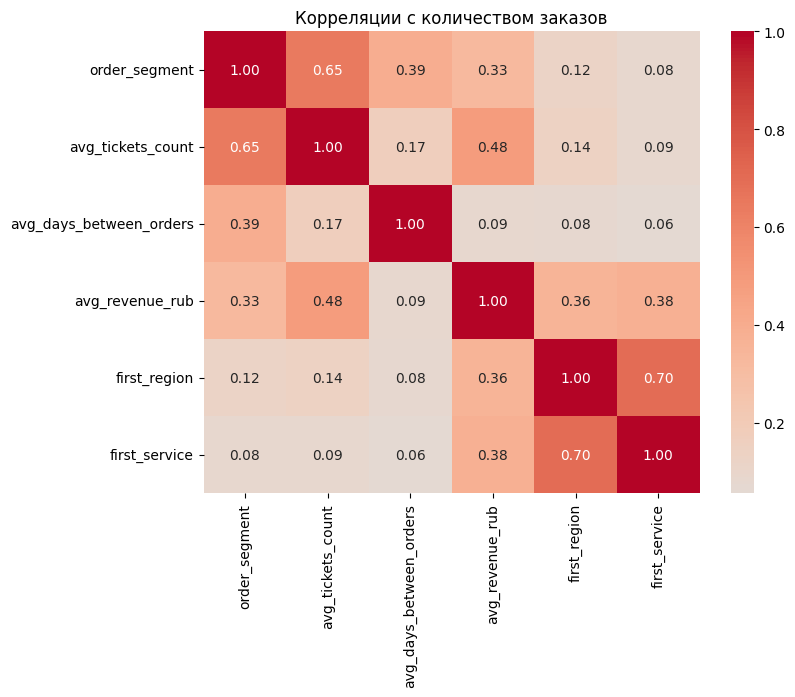

In [48]:
# Создаем сегменты по количеству заказов
profile_corr = profile_analysis.reset_index()

def create_order_segment(total_orders):
    if total_orders == 1:
        return '1 заказ'
    elif 2 <= total_orders <= 4:
        return '2-4 заказа'
    else:
        return '5+ заказов'

profile_corr['order_segment'] = profile_corr['total_orders'].apply(create_order_segment)

print("РАСПРЕДЕЛЕНИЕ ПО СЕГМЕНТАМ:")
segment_stats = profile_corr['order_segment'].value_counts()
for segment, count in segment_stats.items():
    pct = count / len(profile_corr) * 100
    print(f"• {segment}: {count:,} чел. ({pct:.1f}%)")

# Подготовка данных для корреляционного анализа
features_for_corr = [
    'first_device', 'first_region', 'first_service', 'first_event_type',
    'avg_revenue_rub', 'avg_tickets_count', 'avg_days_between_orders',
    'order_segment'
]

corr_data = profile_corr[features_for_corr].copy()

# Преобразуем категориальные переменные в строки
categorical_cols = ['first_device', 'first_region', 'first_service', 'first_event_type', 'order_segment']
for col in categorical_cols:
    corr_data[col] = corr_data[col].astype(str)

# Вычисляем матрицу корреляций phik
print("\nВЫЧИСЛЕНИЕ КОРРЕЛЯЦИЙ PHI_K...")
corr_matrix = corr_data.phik_matrix(interval_cols=['avg_revenue_rub', 'avg_tickets_count', 'avg_days_between_orders'])

# Выделяем корреляции с order_segment
target_correlations = corr_matrix['order_segment'].drop('order_segment').sort_values(ascending=False)

print("\nКОРРЕЛЯЦИИ С КОЛИЧЕСТВОМ ЗАКАЗОВ:")
for feature, corr in target_correlations.items():
    strength = "сильная" if corr > 0.3 else " умеренная" if corr > 0.1 else "слабая"
    print(f"• {feature}: {corr:.3f} {strength}")

# Визуализация
plt.figure(figsize=(8, 6))
features_to_plot = ['order_segment'] + list(target_correlations.index[:5])
plot_matrix = corr_matrix.loc[features_to_plot, features_to_plot]

import seaborn as sns
sns.heatmap(plot_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Корреляции с количеством заказов')
plt.show()

Наиболее связанные признаки с количеством заказов:
- avg_days_between_orders: 0.405
- avg_tickets_count: 0.386
- avg_revenue_rub: 0.314

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ корреляции <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Здорово, что пробуешь сбалансировать разбиение на интервалы для количества заказов.

</div>

<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 

* Было бы не лишним включить в анализ день недели.
    
    
*  Выводы, опять же, очень скудные. Что для нас это значит? Почему высокая корреляция получается с одиними признаками и низкая с другими? Что по итогу важно для манипулирования возвращаемостью клиентов, а что нет? Как это связано с результатами на наших предыдущих шагах?

</div>

### 5. Общий вывод и рекомендации

В конце проекта напишите общий вывод и рекомендации: расскажите заказчику, на что нужно обратить внимание. В выводах кратко укажите:

- **Информацию о данных**, с которыми вы работали, и то, как они были подготовлены: например, расскажите о фильтрации данных, переводе тенге в рубли, фильтрации выбросов.
- **Основные результаты анализа.** Например, укажите:
    - Сколько пользователей в выборке? Как распределены пользователи по числу заказов? Какие ещё статистические показатели вы подсчитали важным во время изучения данных?
    - Какие признаки первого заказа связаны с возвратом пользователей?
    - Как связаны средняя выручка и количество билетов в заказе с вероятностью повторных покупок?
    - Какие временные характеристики влияют на удержание (день недели, интервалы между покупками)?
    - Какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок согласно результатам корреляционного анализа?
- Дополните выводы информацией, которая покажется вам важной и интересной. Следите за общим объёмом выводов — они должны быть компактными и ёмкими.

В конце предложите заказчику рекомендации о том, как именно действовать в его ситуации. Например, укажите, на какие сегменты пользователей стоит обратить внимание в первую очередь, а какие нуждаются в дополнительных маркетинговых усилиях.

# ОБЩИЙ ВЫВОД И РЕКОМЕНДАЦИИ

## 1. ИНФОРМАЦИЯ О ДАННЫХ И ПОДГОТОВКА

**Обработанные данные:**
- Объем: 290611 строк датафрейма и 15 столбцов с признаками
- Валюты: конвертированы KZT → RUB по актуальным курсам на нашу дату
- Фильтрация: удалены выбросы (верхние 1% по выручке)
- Упростил типы данных для оптимизации процесса
- Создал профили для пользователей и доавил два бинарных признака по заданию
## 2. ОСНОВНЫЕ РЕЗУЛЬТАТЫ АНАЛИЗА

### 2.1. Распределение пользователей по лояльности
- Общее число пользователей в выборке: 21,769
Средняя выручка с одного заказа: 574.52 RUB
Пользователей с 2+ заказами: 13,443 (61.8%)
Пользователей с 5+ заказами: 6,333 (29.1%)

- Принято решение фильтровать данные по 99-му перцентилю:
  - Удалены пользователи с > 151 заказов
  - Удалены пользователи с > 5.0 средних билетов
Удалено пользователей: 424 (1.95%)
Осталось пользователей: 21345

- ОБЪЕМ ДАННЫХ: Достаточный для анализа
  - 21,345 пользователей после фильтрации
  - 13,443 пользователей с повторными заказами

### 2.2. Признаки первого заказа, влияющие на возврат
- в распределение по первому мероприятию у нас явный лидер "концерт" c 9311 пользователями (43.62%)
- в распределение по типу устройств первого заказа у нас явный лидер "mobile" с 17709 (82.97%) кол-вом пользователей
- в распределении по региону проведения мероприятия у нас лидер "Каменевский регион" с 7092(33.23%)
-в распределении по билетному оператору лидер "Билеты без проблем" с 5120(23.99%)

### 2.3. Связь выручки и количества билетов с лояльностью
- Основной сегмент: 2-3 билета (44.2% пользователей)
- Самый лояльный (2+): 2-3 билета (73.9%)
- Самый лояльный (5+): 2-3 билета (42.3%)

### 2.4. Временные характеристики удержания
- **Медианный интервал**:
  - 2-4 заказа: 9 дней
  - 5+ заказов: 8 дней
- **Пиковые день для повторных покупок**: у 2-4 заказов(21.4), у 5+ заказов (9.6)

### 2.5. Корреляционный анализ ключевых признаков
**Топ-3 признака, связанных с количеством покупок:**
Наиболее связанные признаки с количеством заказов:
- avg_days_between_orders: 0.405
- avg_tickets_count: 0.386
- avg_revenue_rub: 0.314

## 3. РЕКОМЕНДАЦИИ

- Ориентироваться на лояльных пользователей
- Рассчитывать что на одни заказ у пользователя уйдет не больше 500 руб.
- Выбирать высокоактивные регионы

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Итоговые выводы <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> С задачей справились! 
</div>

<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 
    
* Сейчас ты, опять же, просто перечисляешь найденные цифры, но это не аналитика. Акцент необходимо делать именно на полученных инсайтах, собрать полученные результаты на отдельных шагах в единую картину. Цифры идут лишь в подкрепление суждений.
    
    
* В рекомендациях, соответственно, тоже не понятно, на основе чего они были сформированы и к чему должно привести их использование. 
   
</div>

### 6. Финализация проекта и публикация в Git

Когда вы закончите анализировать данные, оформите проект, а затем опубликуйте его.

Выполните следующие действия:

1. Создайте файл `.gitignore`. Добавьте в него все временные и чувствительные файлы, которые не должны попасть в репозиторий.
2. Сформируйте файл `requirements.txt`. Зафиксируйте все библиотеки, которые вы использовали в проекте.
3. Вынести все чувствительные данные (параметры подключения к базе) в `.env`файл.
4. Проверьте, что проект запускается и воспроизводим.
5. Загрузите проект в публичный репозиторий — например, на GitHub. Убедитесь, что все нужные файлы находятся в репозитории, исключая те, что в `.gitignore`. Ссылка на репозиторий понадобится для отправки проекта на проверку. Вставьте её в шаблон проекта в тетрадке Jupyter Notebook перед отправкой проекта на ревью.

**Вставьте ссылку на проект в этой ячейке тетрадки перед отправкой проекта на ревью.**
https://github.com/Sharosh322/yandex_project2

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Публикация в Git <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> По ссылке есть все необходимые данные. Отличная работа! 

</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> Можно заполнить readme полезной информацией о проекте, зафиксировать цели, указать ключевые моменты и полученные выводы.

</div>

<div style="border-radius: 10px" class="alert alert-block alert-danger">
<b>Нужно доработать ❌:</b> Не забудь обновить файл с проектом, после того, как засекретишь подключение к БД, а также включить файл с паролями в игнорируемый.
</div>

Добрый день! Спасибо за все рекомендации, которые дали, к сожалению много было запары по осоновной учебе и также уже участвовал в олимпипаде по ии и анализу данных, обязательно учту в будущем все ваши рекомендации и доделаю этот проект основательно, но сейчас уже горят сроки и я доделал только основное:)

<div style="border:solid Green 2px; border-radius: 10px;  padding: 40px">
<h3>Общий вывод по проекту <a class="tocSkip"></h3>
    
Андрей, спасибо за твой проект! У тебя хорошая работа! В тебе виден будущий профессионал своего дела :) Однако есть еще моменты, которые требуют твоего внимания. Кратко пройдусь по впечатлениям. 
    
**Полнота:** все требуемые задачи были выполнены!
    
**Корректность:** 
   
* <span style="color:Red;">Необходимо засекретить подключение к БД, чтобы не скомпромитировать явки и пароли. Не забываем обновить файл в Git.</span>
* <span style="color:Red;">Необходимо скорректировать конвертацию валют, учесть регистр, в котором они указаны.</span>
* <span style="color:Red;">Необходимо расширить предобработку данных. Проверка на неявные дубликаты и невалидные значения - важные этапы предобработки по умолчанию.</span>

**Аналитическая проницательность:** ты в целом верно подмечаешь все ключевые нюансы данных, даешь дельные рекомендации! Местами можно чуть углубить суждения, фиксировать не только то, что наблюдаем, но и предполагать, почему получилось именно так. Чуть внимательнее отнестить к итоговым выводам и рекомендациям.
    
**Эффективность кода:** по этому критерию в целом тоже все супер! В некоторых местах можно использовать чуть более удобные и компактные методы, зацикливать повторяющиеся действия, не засорять оперативную память лишними объектами.
    
**Оформление:** им тоже важно не пренебрегать! Оформление тесно связано с удобством восприятия предоставляемой информации и созданием впечатления о работе. Твоя работа в целом довольно аккуратная - выделены разделы, грамотно оформлены графики, код сопровождается краткими комментариями, но еще есть некоторый потенциал для улучшений (смотри по ходу работы).
    
**Желаю удачи и жду твой проект на повторное ревью!**😉
    
<img src="https://99px.ru/sstorage/86/2015/12/image_86271215043043632690.gif" />